# <span style="background-color: NavajoWhite;">**Lending Case Club Sudy**.</span>
## <span style="background-color: LightCyan;">**Layout of the Project :**</span>
> ### 1.Objective :
> ### 2.Data Cleaning
> ### 3.Feature Engineering
> ### 4.EDA
> ### 5.Insights and Observations
> ### 6.Summary and Recommendations

# <font color = GoldenRod > Data Analysis : 

## 1. <span style="color: DarkSlateBlue;">**Objective:**</span>


##### <span style="background-color: LightPink;">**Minimize Credit Losses:**</span> Reduce financial losses from loans by identifying and minimizing loans to high-risk applicants.

##### <span style="background-color: LightPink;">**Identify High-Risk Applicants:**</span> Use exploratory data analysis (EDA) to pinpoint characteristics or patterns that signify high-risk borrowers, particularly those who are likely to be charged-off.

##### <span style="background-color: LightPink;">**Understand Driver Variables:**</span> Determine key variables that are strong indicators of potential default. This includes analyzing borrower behavior, loan characteristics, and external factors.

##### <span style="background-color: LightPink;">**Improve Risk Assessment Models:**</span> Leverage insights gained from EDA to enhance the company’s risk assessment capabilities and refine its lending strategies.

##### <span style="background-color: LightPink;">**Enhance Loan Approval Process:**</span> Implement findings to optimize the loan approval process, ensuring loans are offered to applicants with a manageable risk profile.

##### <span style="background-color: LightPink;">**Facilitate Financial Planning:**</span> Assist the financial planning team in understanding potential risks, aiding in more accurate financial forecasting and resource allocation.

##### <span style="background-color: LightPink;">**Knowledge Development:**</span> Encourage the team to deepen their understanding of risk analytics, enhancing their ability to make informed decisions using data-driven insights.

## <font color = LightCoral >**2. Data Cleaning :**

### **Null Values Treatment**

#### Importing the required libraries

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [154]:
df = pd.read_csv("loan.csv")
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

#### To check the Null values of the columns :

In [155]:
c=df['mths_since_last_record']
total_rows = len(c)
total_null = c.isnull().sum()
perc_null = (total_null/total_rows)*100
print('Total percentage of null value in column is')
perc_null


Total percentage of null value in column is


92.98537150338646

##### Or

In [156]:
Percentage_null_values = pd.DataFrame((df.isna().sum()/len(df))*100)

In [157]:
x=Percentage_null_values.loc['id',:]
Y=pd.DataFrame(x)
Y

id
0  0.0

#### We created the new data frame of Column wise Percentage Null value : **Percentage_null_values**

In [158]:
Percentage_null_values=Percentage_null_values.reset_index()
Percentage_null_values.columns = ['Column_Name','Perc_Null']

In [159]:
Percentage_null_values

Column_Name   Perc_Null
0                            id    0.000000
1                     member_id    0.000000
2                     loan_amnt    0.000000
3                   funded_amnt    0.000000
4               funded_amnt_inv    0.000000
..                          ...         ...
106                   tax_liens    0.098195
107             tot_hi_cred_lim  100.000000
108           total_bal_ex_mort  100.000000
109              total_bc_limit  100.000000
110  total_il_high_credit_limit  100.000000

[111 rows x 2 columns]

#### For filtering the columns as per null values percentage

#### Finding the column name whose null value percentage is <font color = red> **Greater than 25**

In [160]:
cond1= Percentage_null_values['Perc_Null'] > 25
not_needed_columns = Percentage_null_values[cond1]
not_needed_columns

Column_Name   Perc_Null
19                             desc   32.585543
28           mths_since_last_delinq   64.662487
29           mths_since_last_record   92.985372
47                     next_pymnt_d   97.129693
50      mths_since_last_major_derog  100.000000
53                 annual_inc_joint  100.000000
54                        dti_joint  100.000000
55        verification_status_joint  100.000000
57                     tot_coll_amt  100.000000
58                      tot_cur_bal  100.000000
59                      open_acc_6m  100.000000
60                       open_il_6m  100.000000
61                      open_il_12m  100.000000
62                      open_il_24m  100.000000
63               mths_since_rcnt_il  100.000000
64                     total_bal_il  100.000000
65                          il_util  100.000000
66                      open_rv_12m  100.000000
67                      open_rv_24m  100.000000
68                       max_bal_bc  100.000000
69                         all_util  100.000000
70                 total_rev_hi_lim  100.000000
71                           inq_fi  100.000000
72                      total_cu_tl  100.000000
73                     inq_last_12m  100.000000
74             acc_open_past_24mths  100.000000
75                      avg_cur_bal  100.000000
76                   bc_open_to_buy  100.000000
77                          bc_util  100.000000
80               mo_sin_old_il_acct  100.000000
81             mo_sin_old_rev_tl_op  100.000000
82            mo_sin_rcnt_rev_tl_op  100.000000
83                   mo_sin_rcnt_tl  100.000000
84                         mort_acc  100.000000
85             mths_since_recent_bc  100.000000
86         mths_since_recent_bc_dlq  100.000000
87            mths_since_recent_inq  100.000000
88   mths_since_recent_revol_delinq  100.000000
89            num_accts_ever_120_pd  100.000000
90                   num_actv_bc_tl  100.000000
91                  num_actv_rev_tl  100.000000
92                      num_bc_sats  100.000000
93                        num_bc_tl  100.000000
94                        num_il_tl  100.000000
95                    num_op_rev_tl  100.000000
96                    num_rev_accts  100.000000
97              num_rev_tl_bal_gt_0  100.000000
98                         num_sats  100.000000
99                 num_tl_120dpd_2m  100.000000
100                    num_tl_30dpd  100.000000
101              num_tl_90g_dpd_24m  100.000000
102              num_tl_op_past_12m  100.000000
103                  pct_tl_nvr_dlq  100.000000
104                percent_bc_gt_75  100.000000
107                 tot_hi_cred_lim  100.000000
108               total_bal_ex_mort  100.000000
109                  total_bc_limit  100.000000
110      total_il_high_credit_limit  100.000000

#### Filter out the columns who has the null percentage <font color = green> Lesser than 25 %

In [161]:
needed_columns = Percentage_null_values[~cond1]
needed_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 106
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Column_Name  53 non-null     object 
 1   Perc_Null    53 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [162]:
cond2=needed_columns['Column_Name']
N_df = df[cond2]

#### We are giving name <font color = green>' N_df' 
#### dropped the columns which has <font color = red>lots of NA values

In [163]:
N_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0   10.65%       162.87     B        B2  ...          171.62   
1   15.27%        59.83     C        C4  ...          119.66   
2   15.96%        84.33     C        C5  ...          649.91   
3   13.49%       339.31     C        C1  ...          357.48   
4   12.69%        67.79     B        B5  ...           67.79   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0             May-16                        0.0            1       INDIVIDUAL   
1             Sep-13                        0.0            1       INDIVIDUAL   
2             May-16                        0.0            1       INDIVIDUAL   
3             Apr-16                        0.0            1       INDIVIDUAL   
4             May-16                        0.0            1       INDIVIDUAL   

  acc_now_delinq chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies  \
0              0                      0.0           0                  0.0   
1              0                      0.0           0                  0.0   
2              0                      0.0           0                  0.0   
3              0                      0.0           0                  0.0   
4              0                      0.0           0                  0.0   

  tax_liens  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 53 columns]

#### Treating outliers

In [164]:
N_df = N_df[N_df['pub_rec'] < N_df['pub_rec'].quantile(0.999)]
N_df = N_df[N_df['annual_inc'] < N_df['annual_inc'].quantile(0.999925)]
N_df = N_df[N_df['total_acc'] < N_df['total_acc'].quantile(0.9996)]

### **Dropping Other Irrelavent Columns :**

#### Now lets explore the columns more in detail...we have meta data ..so if needed lets drop more columns that are **not required**

#### By going through the meta data we find out that the following columns are not of great use for our analysis
<span style="color: Chocolate;">**Columns names are : 'id','member_id','url', 'title', 'zip_code','application_type', 'revol_bal' , 'last_pymnt_d' , 'policy_code' </span>**

In [165]:
New_df=N_df.drop(['id','member_id','url', 'title', 'zip_code','application_type', 'revol_bal' , 'policy_code'],axis=1,inplace = False)
New_df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade                 emp_title emp_length  ...  \
0     B        B2                       NaN  10+ years  ...   
1     C        C4                     Ryder   < 1 year  ...   
2     C        C5                       NaN  10+ years  ...   
3     C        C1       AIR RESOURCES BOARD  10+ years  ...   
4     B        B5  University Medical Group     1 year  ...   

  collection_recovery_fee  last_pymnt_d last_pymnt_amnt last_credit_pull_d  \
0                    0.00        Jan-15          171.62             May-16   
1                    1.11        Apr-13          119.66             Sep-13   
2                    0.00        Jun-14          649.91             May-16   
3                    0.00        Jan-15          357.48             Apr-16   
4                    0.00        May-16           67.79             May-16   

  collections_12_mths_ex_med acc_now_delinq chargeoff_within_12_mths  \
0                        0.0              0                      0.0   
1                        0.0              0                      0.0   
2                        0.0              0                      0.0   
3                        0.0              0                      0.0   
4                        0.0              0                      0.0   

  delinq_amnt  pub_rec_bankruptcies  tax_liens  
0           0                   0.0        0.0  
1           0                   0.0        0.0  
2           0                   0.0        0.0  
3           0                   0.0        0.0  
4           0                   0.0        0.0  

[5 rows x 45 columns]

#### We have given a name **New_df** to the data frame after removing the unwanted columns

### **Removing Duplicate Rows** :

#### Removing the **Dupicate rows**

In [166]:
New_df = New_df.drop_duplicates()
New_df

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           5000         5000           4975.0   36 months   10.65%   
1           2500         2500           2500.0   60 months   15.27%   
2           2400         2400           2400.0   36 months   15.96%   
3          10000        10000          10000.0   36 months   13.49%   
4           3000         3000           3000.0   60 months   12.69%   
...          ...          ...              ...         ...      ...   
39712       2500         2500           1075.0   36 months    8.07%   
39713       8500         8500            875.0   36 months   10.28%   
39714       5000         5000           1325.0   36 months    8.07%   
39715       5000         5000            650.0   36 months    7.43%   
39716       7500         7500            800.0   36 months   13.75%   

       installment grade sub_grade                   emp_title emp_length  \
0           162.87     B        B2                         NaN  10+ years   
1            59.83     C        C4                       Ryder   < 1 year   
2            84.33     C        C5                         NaN  10+ years   
3           339.31     C        C1         AIR RESOURCES BOARD  10+ years   
4            67.79     B        B5    University Medical Group     1 year   
...            ...   ...       ...                         ...        ...   
39712        78.42     A        A4             FiSite Research    4 years   
39713       275.38     C        C1  Squarewave Solutions, Ltd.    3 years   
39714       156.84     A        A4                         NaN   < 1 year   
39715       155.38     A        A2                         NaN   < 1 year   
39716       255.43     E        E2            Evergreen Center   < 1 year   

       ... collection_recovery_fee  last_pymnt_d last_pymnt_amnt  \
0      ...                    0.00        Jan-15          171.62   
1      ...                    1.11        Apr-13          119.66   
2      ...                    0.00        Jun-14          649.91   
3      ...                    0.00        Jan-15          357.48   
4      ...                    0.00        May-16           67.79   
...    ...                     ...           ...             ...   
39712  ...                    0.00        Jul-10           80.90   
39713  ...                    0.00        Jul-10          281.94   
39714  ...                    0.00        Apr-08            0.00   
39715  ...                    0.00        Jan-08            0.00   
39716  ...                    0.00        Jun-10          256.59   

      last_credit_pull_d collections_12_mths_ex_med acc_now_delinq  \
0                 May-16                        0.0              0   
1                 Sep-13                        0.0              0   
2                 May-16                        0.0              0   
3                 Apr-16                        0.0              0   
4                 May-16                        0.0              0   
...                  ...                        ...            ...   
39712             Jun-10                        NaN              0   
39713             Jul-10                        NaN              0   
39714             Jun-07                        NaN              0   
39715             Jun-07                        NaN              0   
39716             Jun-10                        NaN              0   

      chargeoff_within_12_mths delinq_amnt  pub_rec_bankruptcies  tax_liens  
0                          0.0           0                   0.0        0.0  
1                          0.0           0                   0.0        0.0  
2                          0.0           0                   0.0        0.0  
3                          0.0           0                   0.0        0.0  
4                          0.0           0                   0.0        0.0  
...                        ...         ...                   ...        ...  
39712                    

#### Adding New Column Sr.no

In [167]:
a = New_df.reset_index()
New_df = a.rename(columns = {'index':'Sr.No'})
New_df['Sr.No'] = range(1, len(New_df) + 1)
New_df.head()

Sr.No  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0      1       5000         5000           4975.0   36 months   10.65%   
1      2       2500         2500           2500.0   60 months   15.27%   
2      3       2400         2400           2400.0   36 months   15.96%   
3      4      10000        10000          10000.0   36 months   13.49%   
4      5       3000         3000           3000.0   60 months   12.69%   

   installment grade sub_grade                 emp_title  ...  \
0       162.87     B        B2                       NaN  ...   
1        59.83     C        C4                     Ryder  ...   
2        84.33     C        C5                       NaN  ...   
3       339.31     C        C1       AIR RESOURCES BOARD  ...   
4        67.79     B        B5  University Medical Group  ...   

  collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                    0.00       Jan-15           171.62             May-16   
1                    1.11       Apr-13           119.66             Sep-13   
2                    0.00       Jun-14           649.91             May-16   
3                    0.00       Jan-15           357.48             Apr-16   
4                    0.00       May-16            67.79             May-16   

  collections_12_mths_ex_med acc_now_delinq chargeoff_within_12_mths  \
0                        0.0              0                      0.0   
1                        0.0              0                      0.0   
2                        0.0              0                      0.0   
3                        0.0              0                      0.0   
4                        0.0              0                      0.0   

  delinq_amnt pub_rec_bankruptcies  tax_liens  
0           0                  0.0        0.0  
1           0                  0.0        0.0  
2           0                  0.0        0.0  
3           0                  0.0        0.0  
4           0                  0.0        0.0  

[5 rows x 46 columns]

### **Unique Value Analysis** :

#### Check Unique Values in Each Column :


In [168]:
unique = New_df.nunique()
unique = pd.DataFrame(unique)
unique

0
Sr.No                       39638
loan_amnt                     884
funded_amnt                  1039
funded_amnt_inv              8189
term                            2
int_rate                      371
installment                 15356
grade                           7
sub_grade                      35
emp_title                   28769
emp_length                     11
home_ownership                  5
annual_inc                   5310
verification_status             3
issue_d                        55
loan_status                     3
pymnt_plan                      1
purpose                        14
addr_state                     50
dti                          2868
delinq_2yrs                    11
earliest_cr_line              525
inq_last_6mths                  9
open_acc                       39
pub_rec                         2
revol_util                   1089
total_acc                      69
initial_list_status             1
out_prncp                    1134
out_prncp_inv                1135
total_pymnt                 37777
total_pymnt_inv             37446
total_rec_prncp              7959
total_rec_int               35082
total_rec_late_fee           1355
recoveries                   4031
collection_recovery_fee      2611
last_pymnt_d                  101
last_pymnt_amnt             34875
last_credit_pull_d            106
collections_12_mths_ex_med      1
acc_now_delinq                  1
chargeoff_within_12_mths        1
delinq_amnt                     1
pub_rec_bankruptcies            2
tax_liens                       1

#### If the column has Unique Value = 1 then it doesn't make sense for analysis <br> Lets, filter out that columns name :

In [169]:
cond = unique[0] == 1
unique [ cond ]

0
pymnt_plan                  1
initial_list_status         1
collections_12_mths_ex_med  1
acc_now_delinq              1
chargeoff_within_12_mths    1
delinq_amnt                 1
tax_liens                   1

#### Lets, drop the above columns from our main data set New_df <br> Columns Name are : pymnt_plan, initial_list_status, collections_12_mths_ex_med, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens	

In [170]:
New_df=New_df.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],axis=1,inplace = False)
New_df.head()

Sr.No  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0      1       5000         5000           4975.0   36 months   10.65%   
1      2       2500         2500           2500.0   60 months   15.27%   
2      3       2400         2400           2400.0   36 months   15.96%   
3      4      10000        10000          10000.0   36 months   13.49%   
4      5       3000         3000           3000.0   60 months   12.69%   

   installment grade sub_grade                 emp_title  ... total_pymnt_inv  \
0       162.87     B        B2                       NaN  ...         5833.84   
1        59.83     C        C4                     Ryder  ...         1008.71   
2        84.33     C        C5                       NaN  ...         3005.67   
3       339.31     C        C1       AIR RESOURCES BOARD  ...        12231.89   
4        67.79     B        B5  University Medical Group  ...         3513.33   

  total_rec_prncp  total_rec_int total_rec_late_fee recoveries  \
0         5000.00         863.16               0.00       0.00   
1          456.46         435.17               0.00     117.08   
2         2400.00         605.67               0.00       0.00   
3        10000.00        2214.92              16.97       0.00   
4         2475.94        1037.39               0.00       0.00   

  collection_recovery_fee last_pymnt_d last_pymnt_amnt  last_credit_pull_d  \
0                    0.00       Jan-15          171.62              May-16   
1                    1.11       Apr-13          119.66              Sep-13   
2                    0.00       Jun-14          649.91              May-16   
3                    0.00       Jan-15          357.48              Apr-16   
4                    0.00       May-16           67.79              May-16   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 39 columns]

#### Now, we are check what is the scenario with the columns whose unique values are less than or equal to 5 and not equal to 1....how many rows are there for each unique values 

In [171]:
cond = (unique[0] <= 5) & (unique[0] > 1)
unique [ cond ]

0
term                  2
home_ownership        5
verification_status   3
loan_status           3
pub_rec               2
pub_rec_bankruptcies  2

In [172]:
## For checking the unique values and their count
cond_1 = New_df.groupby(by='term').count()
cond_1 = cond_1['Sr.No']
cond_1 = pd.DataFrame(cond_1)
print(cond_1)
## For checking the unique values and their count
cond_1 = New_df.groupby(by='home_ownership').count()
cond_1 = cond_1['Sr.No']
cond_1 = pd.DataFrame(cond_1)
print(cond_1)

## For checking the unique values and their count
cond_1 = New_df.groupby(by='verification_status').count()
cond_1 = cond_1['Sr.No']
cond_1 = pd.DataFrame(cond_1)
print(cond_1)

## For checking the unique values and their count
cond_1 = New_df.groupby(by='loan_status').count()
cond_1 = cond_1['Sr.No']
cond_1 = pd.DataFrame(cond_1)
print(cond_1)

## For checking the unique values and their count
cond_1 = New_df.groupby(by='pub_rec').count()
cond_1 = cond_1['Sr.No']
cond_1 = pd.DataFrame(cond_1)
print(cond_1)

## For checking the unique values and their count
cond_1 = New_df.groupby(by='pub_rec_bankruptcies').count()
cond_1 = cond_1['Sr.No']
cond_1 = pd.DataFrame(cond_1)
print(cond_1)

           Sr.No
term            
36 months  29036
60 months  10602
                Sr.No
home_ownership       
MORTGAGE        17614
NONE                3
OTHER              98
OWN              3052
RENT            18871
                     Sr.No
verification_status       
Not Verified         16881
Source Verified       9966
Verified             12791
             Sr.No
loan_status       
Charged Off   5616
Current       1137
Fully Paid   32885
         Sr.No
pub_rec       
0        37582
1         2056
                      Sr.No
pub_rec_bankruptcies       
0.0                   37270
1.0                    1674


In [173]:
## Everything looks good ...Lets check the data type of each column
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39638 entries, 0 to 39637
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sr.No                    39638 non-null  int64  
 1   loan_amnt                39638 non-null  int64  
 2   funded_amnt              39638 non-null  int64  
 3   funded_amnt_inv          39638 non-null  float64
 4   term                     39638 non-null  object 
 5   int_rate                 39638 non-null  object 
 6   installment              39638 non-null  float64
 7   grade                    39638 non-null  object 
 8   sub_grade                39638 non-null  object 
 9   emp_title                37184 non-null  object 
 10  emp_length               38566 non-null  object 
 11  home_ownership           39638 non-null  object 
 12  annual_inc               39638 non-null  float64
 13  verification_status      39638 non-null  object 
 14  issue_d               

### **Changing the Data Type of the required columns** :

In [174]:
## Checking the data type of each column
print(New_df.dtypes)

Sr.No                        int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt         

In [175]:
## checking only the columns whose data type is object
cond_4 = New_df.select_dtypes(include=['object'])
cond_4.dtypes

term                   object
int_rate               object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
purpose                object
addr_state             object
earliest_cr_line       object
revol_util             object
last_pymnt_d           object
last_credit_pull_d     object
dtype: object

##### So, the columns : term , int_rate, grade , sub_grade , emp_title , emp_length , home_ownership , verification_status , loan_status , pymnt_plan , purpose , revol_util , initial_list_status , last_credit_pull_d , application_type

checking the each column and if needed then will change the dtypes of that column as per requirement

In [176]:
## Chaning the dtype of Term column and also we have to remove the months word from the column :
New_df['term'] = New_df['term'].str.replace(' months', '').str.strip().astype(int)

# Now check the cleaned data
print(New_df['term'].head())

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int32


In [177]:
# similar to the int_rate column : we have to remove the % sign and change the dtype of the column

In [178]:
## Changing the data type of interest rate :
New_df['int_rate'] = New_df['int_rate'].str.replace('%', '').astype(float)

In [179]:
## Same we have to do with 'revol_util'
New_df['revol_util'] = New_df['revol_util'].str.replace('%', '').astype(float)

In [180]:
## also we are seeing problem in column : last_credit_pull_d
# Correct the date format to match "Month-Year"
New_df['last_credit_pull_d'] = pd.to_datetime(New_df['last_credit_pull_d'], format='%b-%y')

# Check the first few entries to confirm successful conversion
print(New_df['last_credit_pull_d'].head())

0   2016-05-01
1   2013-09-01
2   2016-05-01
3   2016-04-01
4   2016-05-01
Name: last_credit_pull_d, dtype: datetime64[ns]


In [181]:
## also we are seeing problem in column : last_pymnt_d
# Correct the date format to match "Month-Year"
New_df['last_pymnt_d'] = pd.to_datetime(New_df['last_pymnt_d'], format='%b-%y')

# Check the first few entries to confirm successful conversion
print(New_df['last_pymnt_d'].head())

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-05-01
Name: last_pymnt_d, dtype: datetime64[ns]


In [182]:
New_df['last_credit_pull_d']

0       2016-05-01
1       2013-09-01
2       2016-05-01
3       2016-04-01
4       2016-05-01
           ...    
39633   2010-06-01
39634   2010-07-01
39635   2007-06-01
39636   2007-06-01
39637   2010-06-01
Name: last_credit_pull_d, Length: 39638, dtype: datetime64[ns]

In [183]:
New_df['emp_length'] = pd.to_numeric(New_df['emp_length'].str.replace("< 1 year", '0').str.extract(r'(\d+)')[0],
                                            errors='coerce', downcast='integer')

In [184]:
## also we are seeing problem in column : issue_d
# Correct the date format to match "Month-Year"
New_df['issue_d'] = pd.to_datetime(New_df['issue_d'], format='%b-%y')

# Check the first few entries to confirm successful conversion
print(New_df['issue_d'].head())

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]


In [185]:
## also we are seeing problem in column : issue_d
# Correct the date format to match "Month-Year"
New_df['earliest_cr_line'] = pd.to_datetime(New_df['earliest_cr_line'], format='%b-%y')

# Check the first few entries to confirm successful conversion
print(New_df['earliest_cr_line'].head())

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]


In [186]:
## Checking the columns type has been changed or not : as previously 14 columns has objet as a dtype now 8 has 
cond_4 = New_df.select_dtypes(include=['object'])
cond_4.dtypes

grade                  object
sub_grade              object
emp_title              object
home_ownership         object
verification_status    object
loan_status            object
purpose                object
addr_state             object
dtype: object

#### Now, create a new data set which only has the dtype (int, float and datetime ) or you can say data set dtype other than object
Give name to the data set as **numeric_df**

In [187]:
numeric_df = New_df.select_dtypes(exclude=['object'])

In [188]:
numeric_df.dtypes

Sr.No                               int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                                int32
int_rate                          float64
installment                       float64
emp_length                        float64
annual_inc                        float64
issue_d                    datetime64[ns]
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
open_acc                            int64
pub_rec                             int64
revol_util                        float64
total_acc                           int64
out_prncp                         float64
out_prncp_inv                     float64
total_pymnt                       float64
total_pymnt_inv                   float64
total_rec_prncp                   float64
total_rec_int                     

So, we have two data set one is **New_df** and other is **numeric_df** 
**numeric_df** is a subset of **New_df** having the columns other than dtype( Object ) so the data set **numeric_df** will help us in performing or ploting the different graphs and finding the correlation betn the columns 

### **Ploting the Box Plot** :

#### Now, let start further analysis : 
#### Checking the outlier in each columns by using the<span style="color: PaleVioletRed;"> **Box Plot** </span> but in this case we have lots of columns so it is better to plot subplot..

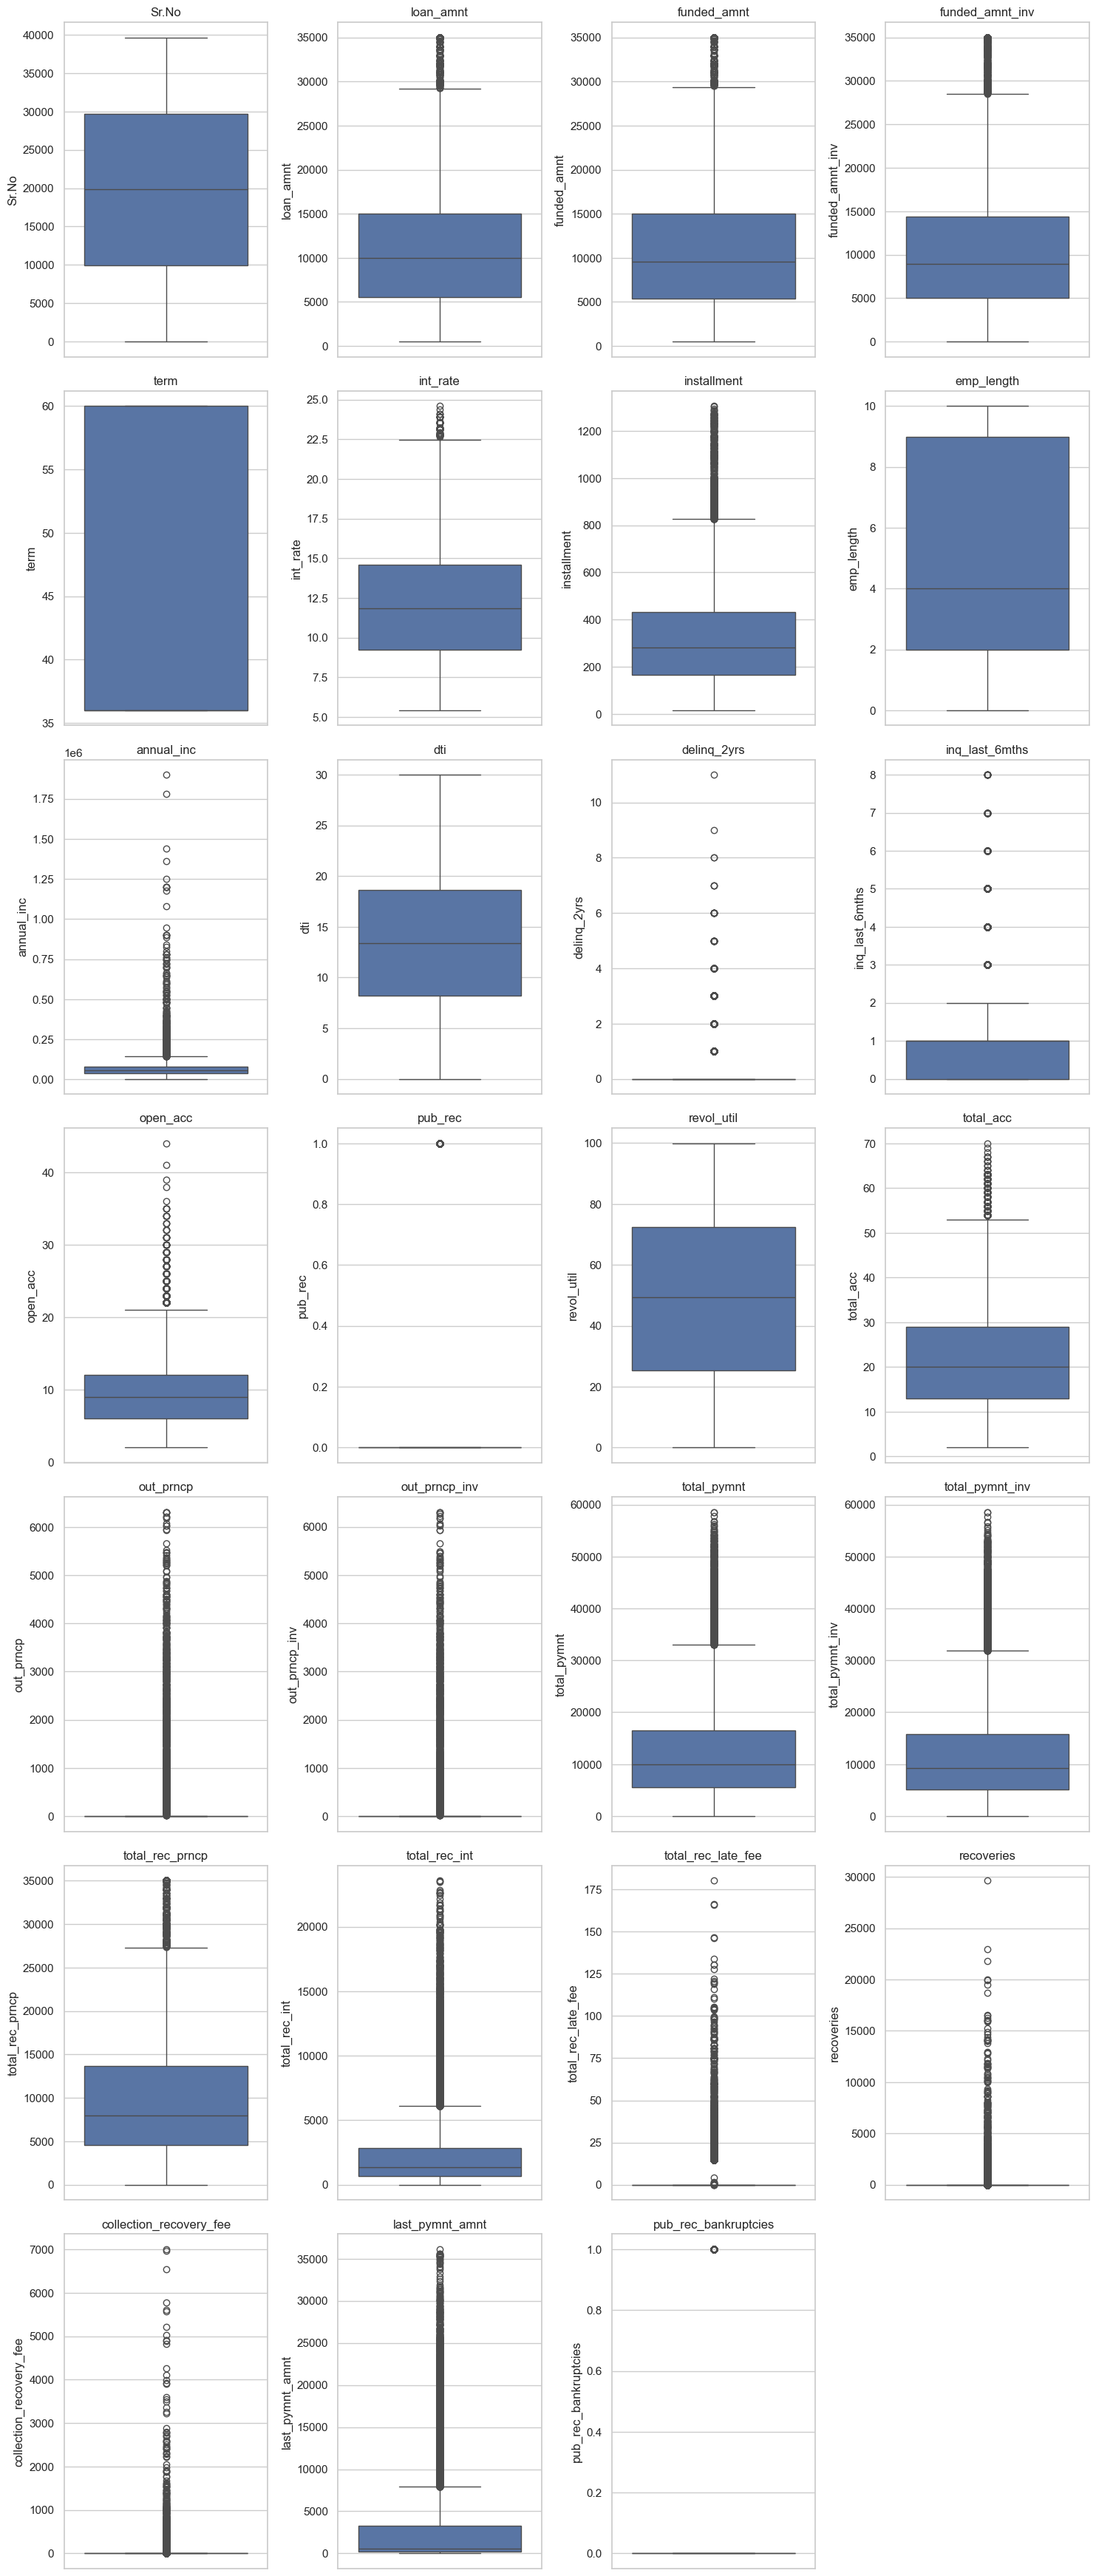

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Setup the dimensions of the grid
n_cols = 4  # Number of columns in the subplot grid
n_rows = len(numeric_df.columns) // n_cols + (len(numeric_df.columns) % n_cols > 0)  # Calculate required number of rows

# Create a large figure to hold all subplots
plt.figure(figsize=(15, n_rows * 5))  # Adjust the size as needed

# Plot each numerical column in numeric_df
for i, column in enumerate(numeric_df.select_dtypes(include=['number']).columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each numerical column
    sns.boxplot(y=numeric_df[column])
    plt.title(column)  # Updated to ensure the title does not add unnecessary space

plt.tight_layout()  # Adjust subplots to fit into the figure neatly
plt.show()


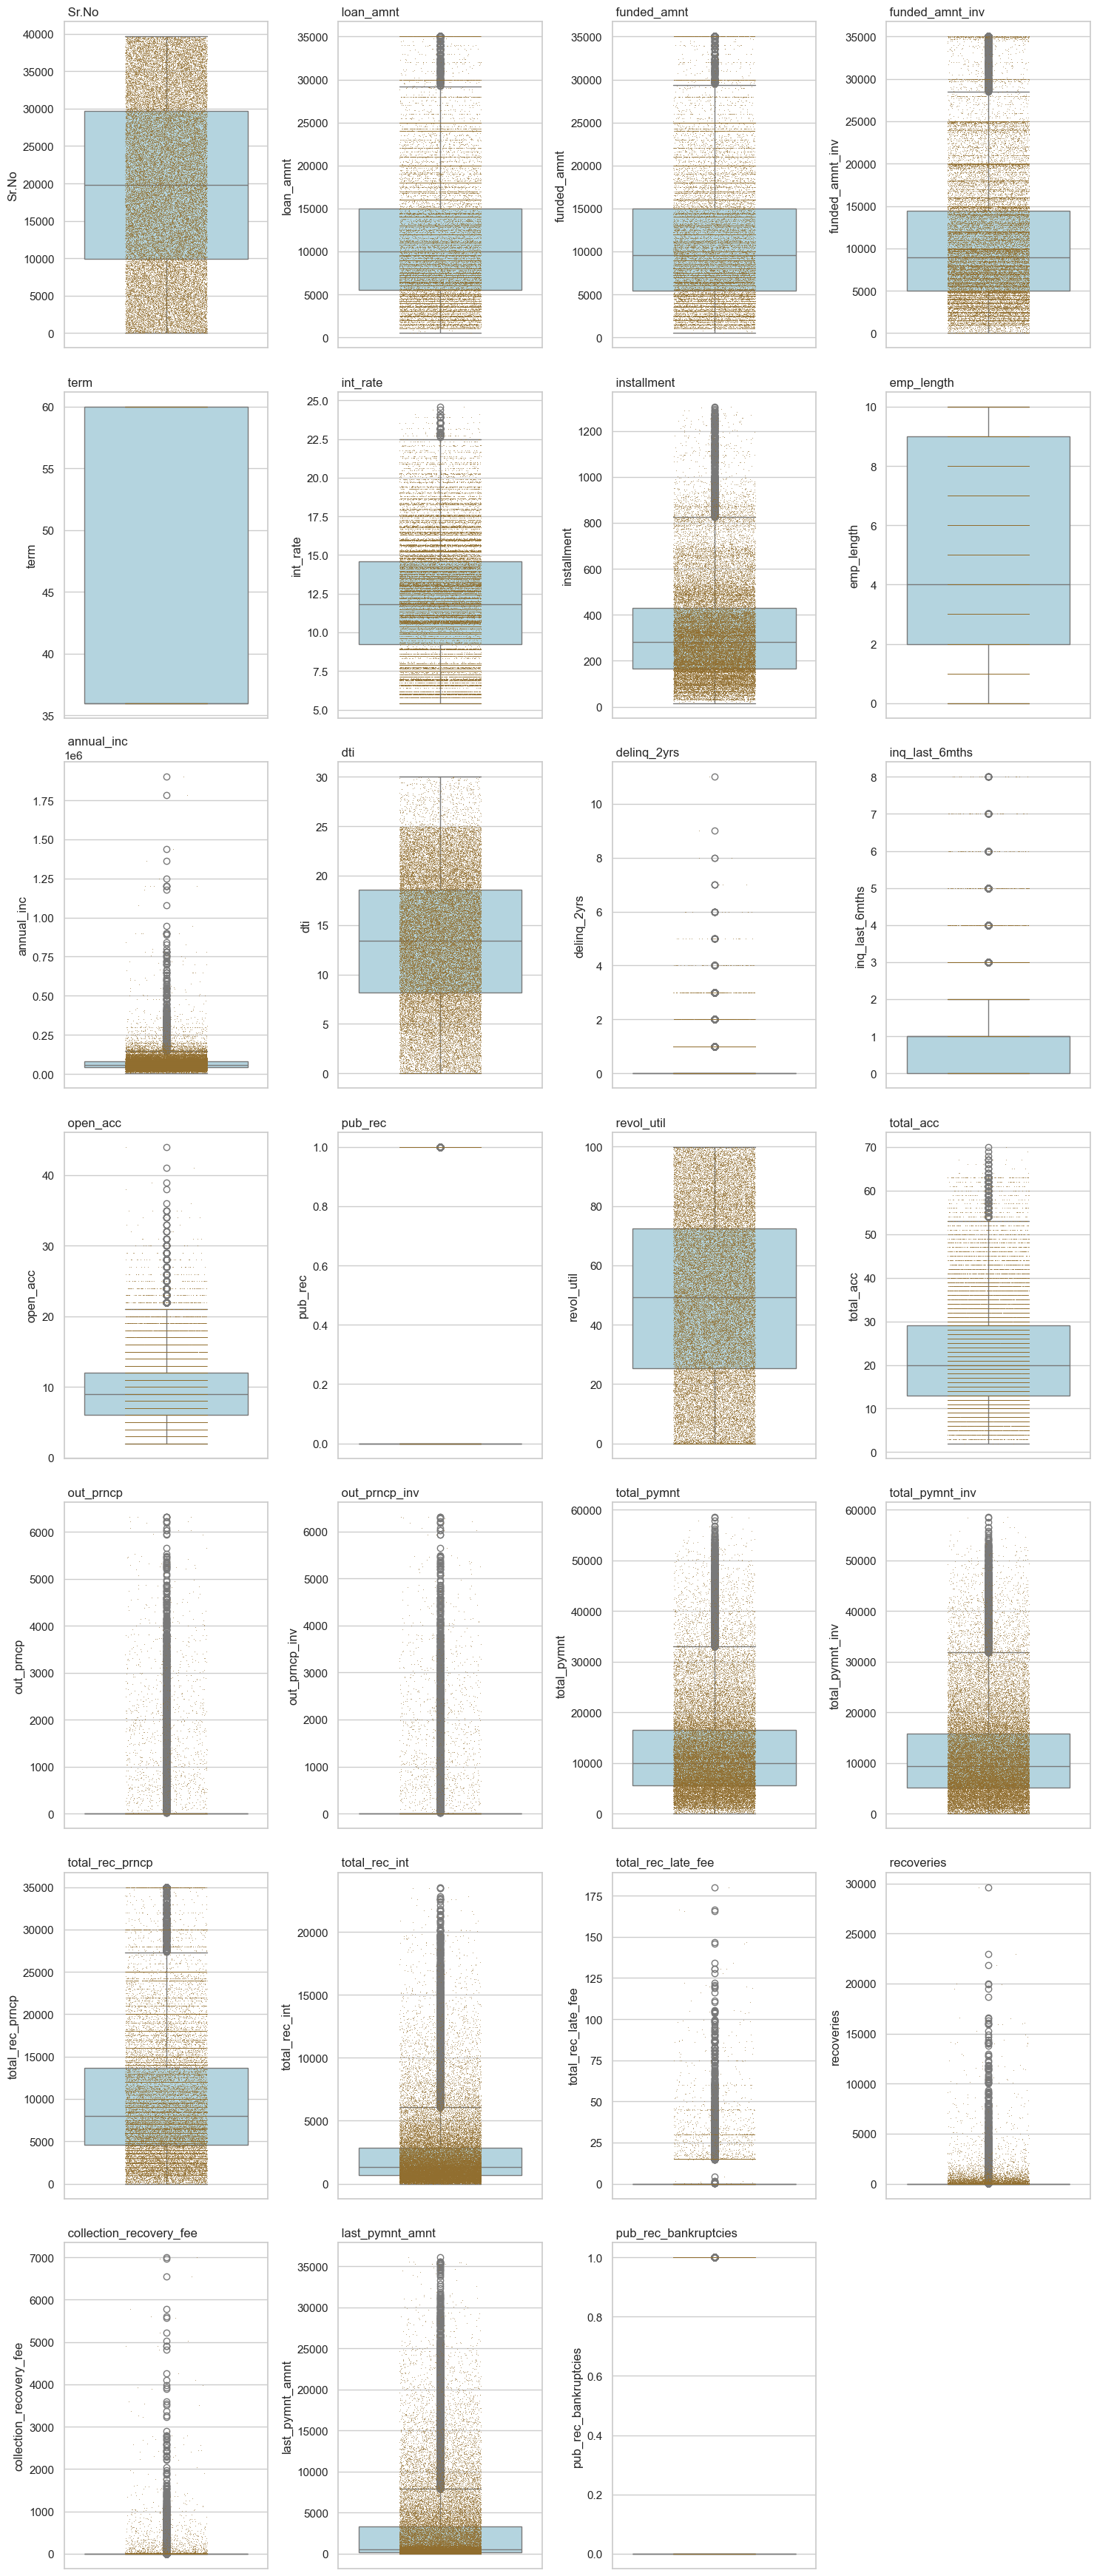

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for plotting
numeric_cols = numeric_df.select_dtypes(include=['number']).columns

# Setup the dimensions of the grid
n_cols = 4  # Number of columns in subplot grid
n_rows = len(numeric_cols) // n_cols + (len(numeric_cols) % n_cols > 0)  # Calculate required number of rows

# Create a large figure to hold all subplots
plt.figure(figsize=(15, n_rows * 5))  # Adjust the size as needed

for i, column in enumerate(numeric_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each numerical column
    sns.boxplot(y=numeric_df[column], ax=ax, color='lightblue')  # Use a light color for the boxplot

    # Add stripplot on top of the boxplot
    sns.stripplot(y=numeric_df[column], color="orange", jitter=0.2, size=0.5, ax=ax)

    # Title for each plot with left alignment
    plt.title(f' {column}', loc='left')

plt.tight_layout()  # Adjust subplots to fit into the figure neatly
plt.show()


## <font color = SandyBrown >**3. Feature Engineering :**

#### Now, we need to create the new column **Credit_Score** based on the columns we have, so that we can compare this column with the other columns and get some insights about the different columns


#### Components of the Credit Score Formula

### Normalization and Inversion of Metrics:

#### Term (`norm_term`):
- **Logic**: <span style="color: blue;">Longer loan terms (60 months) are generally considered riskier than shorter terms (36 months) because they indicate a longer period during which something can go wrong with the borrower's financial situation.</span>
- **Calculation**: <span style="color: red;">I assigned -1 for 60 months (more risk) and 1 for 36 months (less risk), representing these risk levels directly.</span>

#### Interest Rate (`norm_int_rate`):
- **Logic**: <span style="color: blue;">A higher interest rate often indicates a higher risk perceived by the lender, and it can also make the loan harder for the borrower to repay.</span>
- **Calculation**: <span style="color: red;">The formula 1 - (interest_rate / max(interest_rate)) inversely scales the interest rate, so a higher rate results in a lower score component.</span>

#### Debt-to-Income Ratio (`norm_dti`):
- **Logic**: <span style="color: blue;">Higher DTI ratios suggest that a borrower has significant debt relative to their income, increasing default risk.</span>
- **Calculation**: <span style="color: red;">The DTI is normalized inversely with 1 - (dti / max(dti)) so that a higher DTI yields a lower score component.</span>

#### Delinquencies in 2 Years (`norm_delinq`):
- **Logic**: <span style="color: blue;">More delinquencies indicate higher financial distress and risk.</span>
- **Calculation**: <span style="color: red;">Normalized inversely as 1 - (delinq_2yrs / (1 + max(delinq_2yrs))) to decrease the score proportionally with the number of delinquencies.</span>

#### Number of Open Accounts (`norm_open_acc`):
- **Logic**: <span style="color: blue;">An optimal number of open accounts is assumed (e.g., 5). Too few might indicate lack of credit history, and too many might suggest overextension.</span>
- **Calculation**: <span style="color: red;">The formula 1 - abs(open_acc - 5) / max(open_acc) normalizes around an optimal point (5 accounts).</span>

#### Revolving Utilization (`norm_revol_util`):
- **Logic**: <span style="color: blue;">Higher utilization can indicate that a borrower is over-reliant on credit, increasing the risk of default.</span>
- **Calculation**: <span style="color: red;">Inversely scaled by 1 - (revol_util / 100) so higher utilization results in a lower component score.</span>

#### Public Records (`norm_pub_rec`):
- **Logic**: <span style="color: blue;">Public records like bankruptcies or judgements are serious negative marks.</span>
- **Calculation**: <span style="color: red;">Inversely scaled as 1 - (pub_rec / (1 + max(pub_rec))).</span>

### Combining Components into a Credit Score:
- The normalized scores from each component are summed and then divided by the number of components (7 in this case). This averages the scores into a single metric between -1 and 1 if not adjusted.
- **Final Scaling**: <span style="color: green;">The resulting score is then scaled to fit a typical credit score range, e.g., from 300 to 800, using the formula 300 + (Credit_Score * 500). This scales and shifts the average score from the -1 to 1 range into the 300 to 800 range, making it resemble common credit scoring models like FICO.</span>


In [191]:
import pandas as pd
import numpy as np

# Sample calculation for creating a credit score
# Normalize and invert some metrics where higher values are riskier

# Normalizing and weighing factors
New_df['norm_term'] = New_df['term'].apply(lambda x: -1 if x == 60 else 1)
New_df['norm_int_rate'] = 1 - (New_df['int_rate'] / max(New_df['int_rate']))
New_df['norm_dti'] = 1 - (New_df['dti'] / max(New_df['dti']))
New_df['norm_delinq'] = 1 - (New_df['delinq_2yrs'] / (1 + max(New_df['delinq_2yrs'])))
New_df['norm_open_acc'] = 1 - abs(New_df['open_acc'] - 5) / max(New_df['open_acc'])  # assuming 5 open accounts is optimal
New_df['norm_revol_util'] = 1 - (New_df['revol_util'] / 100)
New_df['norm_pub_rec'] = 1 - (New_df['pub_rec'] / (1 + max(New_df['pub_rec'])))

# Combining the factors into a single score
New_df['Credit_Score'] = (New_df['norm_term'] + 
                          New_df['norm_int_rate'] + 
                          New_df['norm_dti'] + 
                          New_df['norm_delinq'] + 
                          New_df['norm_open_acc'] + 
                          New_df['norm_revol_util'] + 
                          New_df['norm_pub_rec']) / 7  # Normalize the sum

# Scale to a score out of 800 for example
New_df['Credit_Score'] = 300 + (New_df['Credit_Score'] * 500)  # Scale from 300 to 800

# Check the new column
print(New_df[['Credit_Score']].head())


   Credit_Score
0    640.176327
1    600.444062
2    657.643590
3    690.062692
4    522.818888


**Update the numeric_df**

In [192]:
numeric_df = New_df.select_dtypes(exclude=['object'])

**Add numeric category fields**

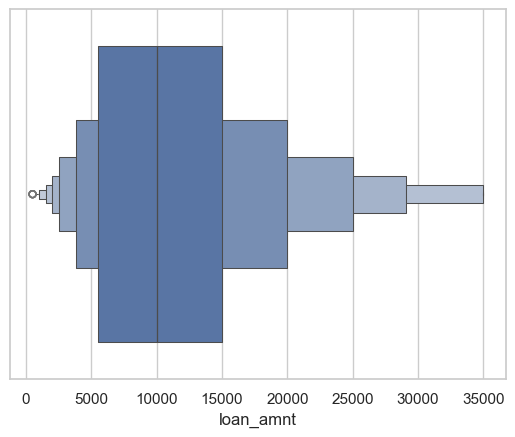

In [193]:
sns.boxenplot(data=New_df, x='loan_amnt')
plt.show()

In [194]:
New_df['loan_amnt_cat'] = pd.cut(New_df['loan_amnt'], bins=[0,5000, 15000, 20000, 25000, 35000], labels=['VL', 'L', 'M', 'H', 'VH'])

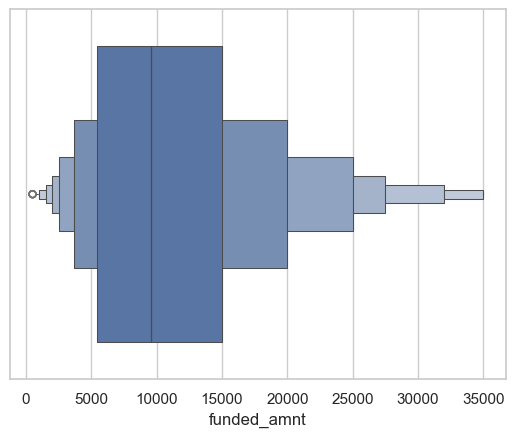

In [195]:
sns.boxenplot(x=New_df['funded_amnt'])
plt.show()

In [196]:
New_df['funded_amnt_cat'] = pd.cut(New_df['funded_amnt'], bins=[0,5000, 15000, 20000, 25000, 35000]
                                   , labels=['VL', 'L', 'M', 'H', 'VH'])

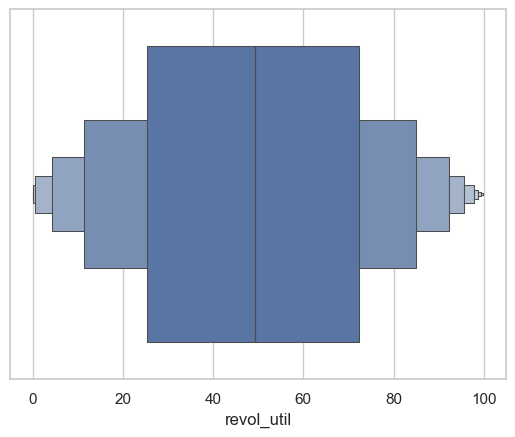

In [197]:
sns.boxenplot(x=New_df['revol_util'])
plt.show()

In [198]:
New_df['revol_util_cat'] = pd.cut(New_df['revol_util'], bins=[0, 25, 75, 100], labels=['low', 'medium', 'high'])

## <font color = BurlyWood >**4. EDA :**

### **Univarient**:

#### More than 80 % had paid fully, around 15 % charged off


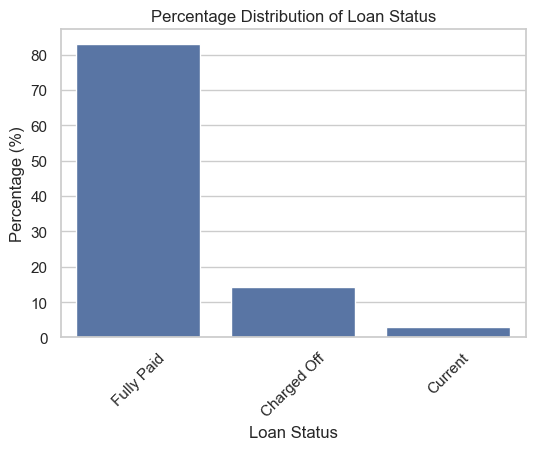

In [199]:

# Calculate the percentage of each loan status category
status_counts = New_df['loan_status'].value_counts(normalize=True) * 100  # normalize=True gives the proportion, multiply by 100 to get percentages

# Convert the series to a DataFrame for easier plotting
status_df = status_counts.reset_index()
status_df.columns = ['loan_status', 'percentage']

# Create the bar graph
plt.figure(figsize=(6,4 ))  # Adjust the figure size as needed
ax = sns.barplot(x='loan_status', y='percentage', data=status_df)

# Add labels and title
plt.title('Percentage Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Percentage (%)')

# Improve readability of x labels especially if many unique values
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Show the plot
plt.show()


#### Most of the loans took by Rent and Mortgage cat

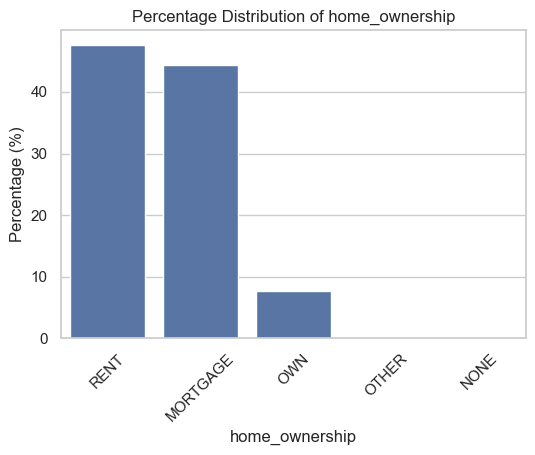

In [200]:
## Home Ownership :b

status_counts = New_df['home_ownership'].value_counts(normalize=True) * 100  # normalize=True gives the proportion, multiply by 100 to get percentages

# Convert the series to a DataFrame for easier plotting
status_df = status_counts.reset_index()
status_df.columns = ['home_ownership', 'percentage']

# Create the bar graph
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
ax = sns.barplot(x='home_ownership', y='percentage', data=status_df)

# Add labels and title
plt.title('Percentage Distribution of home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Percentage (%)')

plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Show the plot
plt.show()

#### Most of the Customers are fall under Not verified Category

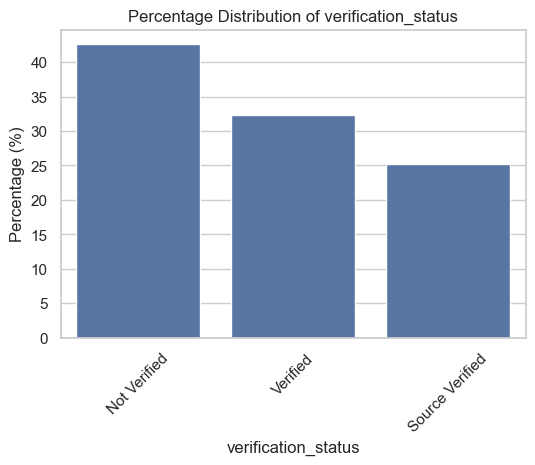

In [201]:
## Verification Status
status_counts = New_df['verification_status'].value_counts(normalize=True) * 100  # normalize=True gives the proportion, multiply by 100 to get percentages

# Convert the series to a DataFrame for easier plotting
status_df = status_counts.reset_index()
status_df.columns = ['verification_status', 'percentage']

# Create the bar graph
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
ax = sns.barplot(x='verification_status', y='percentage', data=status_df)

# Add labels and title
plt.title('Percentage Distribution of verification_status')
plt.xlabel('verification_status')
plt.ylabel('Percentage (%)')

plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Show the plot
plt.show()

#### 10 years experience people were taking more loans followed by newly joined and 2 year experience Emply

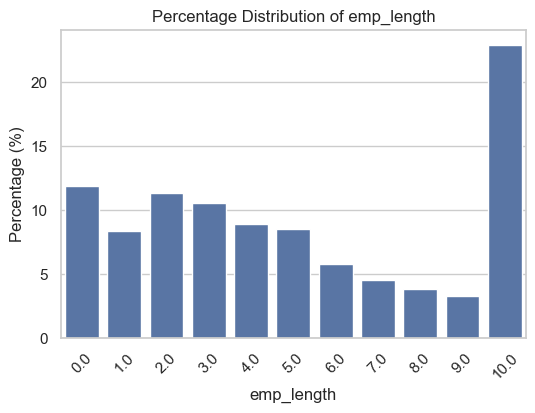

In [202]:
## emp_length
status_counts = New_df['emp_length'].value_counts(normalize=True) * 100  # normalize=True gives the proportion, multiply by 100 to get percentages

# Convert the series to a DataFrame for easier plotting
status_df = status_counts.reset_index()
status_df.columns = ['emp_length', 'percentage']

# Create the bar graph
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
ax = sns.barplot(x='emp_length', y='percentage', data=status_df)

# Add labels and title
plt.title('Percentage Distribution of emp_length')
plt.xlabel('emp_length')
plt.ylabel('Percentage (%)')

# Improve readability of x labels especially if many unique values
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Show the plot
plt.show()

#### The Most of the Customer are categories as Grade B followed by A, C, D

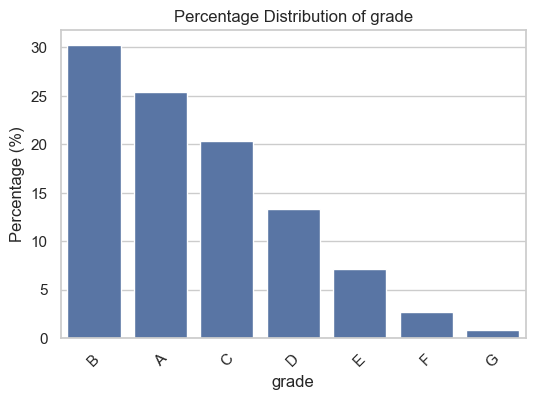

In [203]:
## grade
status_counts = New_df['grade'].value_counts(normalize=True) * 100  # normalize=True gives the proportion, multiply by 100 to get percentages

# Convert the series to a DataFrame for easier plotting
status_df = status_counts.reset_index()
status_df.columns = ['grade', 'percentage']

# Create the bar graph
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
ax = sns.barplot(x='grade', y='percentage', data=status_df)

# Add labels and title
plt.title('Percentage Distribution of grade')
plt.xlabel('grade')
plt.ylabel('Percentage (%)')

# Improve readability of x labels especially if many unique values
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Show the plot
plt.show()

### **Segmented**:

#### We can see there is not strong positive relation betn the charged off people and the status of the loan verification

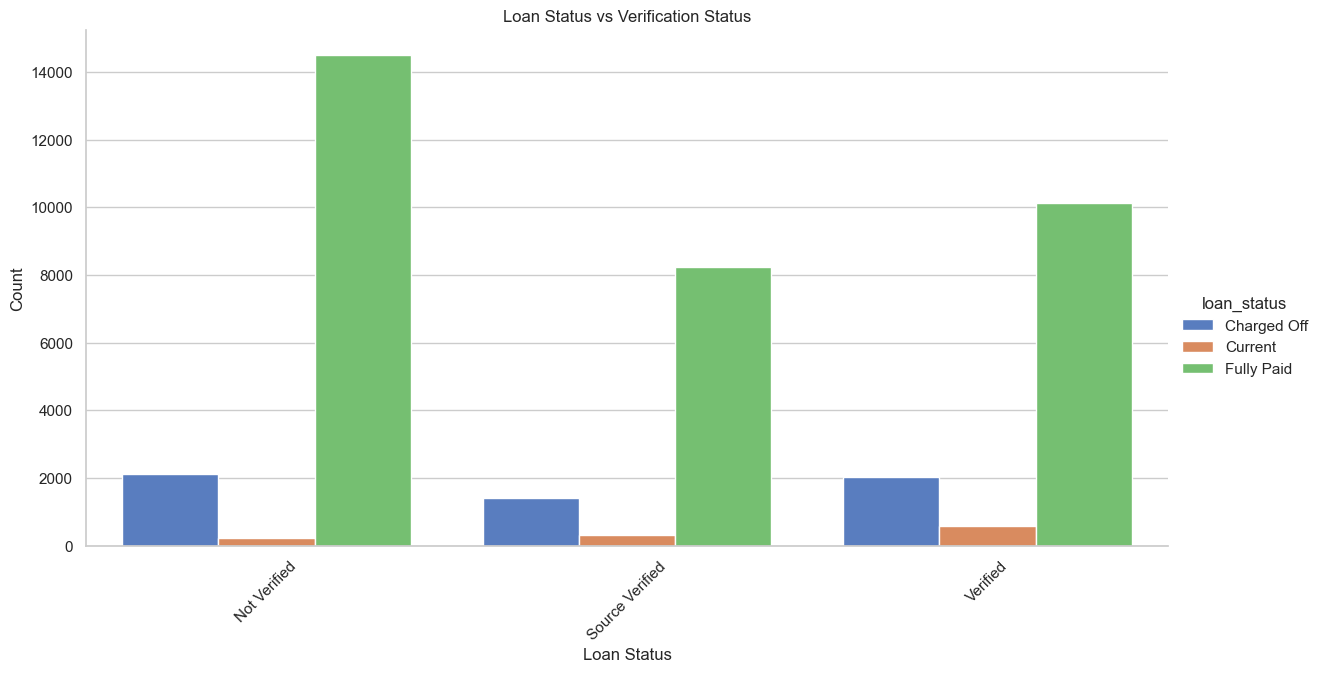

In [204]:
# Calculate counts of each combination
count_data = New_df.groupby([ 'verification_status', 'loan_status']).size().reset_index(name='count')
# Create a grouped bar chart
g = sns.catplot(
    x='verification_status', 
    y='count', 
    hue='loan_status', 
    data=count_data, 
    kind='bar', 
    height=6, 
    aspect=2,  # width of each facet in inches
    palette='muted'
)

# Set titles and labels
g.ax.set_title('Loan Status vs Verification Status')
g.set_xlabels('Loan Status')
g.set_ylabels('Count')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Show the plot
plt.show()


#### So the defaulter percentage is same irrespective of there experience

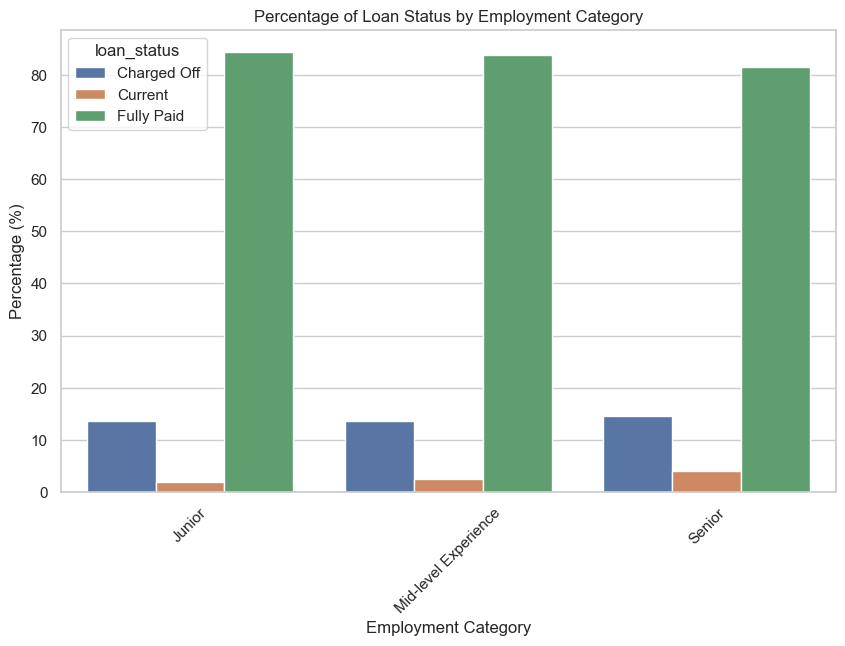

In [205]:

# Define categories
bins = [-1, 2, 6, float('inf')]  # -1 to include 0 in the first bin
labels = ['Junior', 'Mid-level Experience', 'Senior']
New_df['emp_category'] = pd.cut(New_df['emp_length'], bins=bins, labels=labels)

# Group by new categories and loan status, count occurrences
count_data = New_df.groupby(['emp_category', 'loan_status']).size().reset_index(name='count')

# Calculate total counts for each category
total_counts = count_data.groupby('emp_category')['count'].transform('sum')

# Calculate percentages
count_data['percentage'] = (count_data['count'] / total_counts) * 100

# Create the bar plot with percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='emp_category', y='percentage', hue='loan_status', data=count_data)

# Add labels and title
plt.title('Percentage of Loan Status by Employment Category')
plt.xlabel('Employment Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Show the plot
plt.show()


#### High Interest rate like greater than 20% leads to defaulter

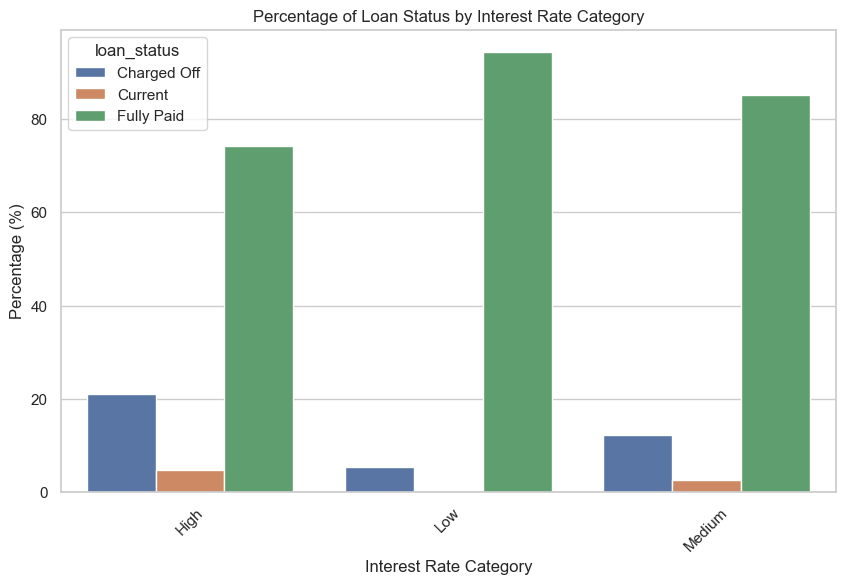

In [206]:
# Define a function to categorize interest rates
def categorize_interest_rate(rate):
    if rate <= 8:
        return 'Low'
    elif rate <= 13:
        return 'Medium'
    elif rate > 13:
        return 'High'
    else:
        return 'NA'

# Apply this function to the int_rate column to create a new category column
New_df['int_rate_category'] = New_df['int_rate'].apply(categorize_interest_rate)

# Group by interest rate category and loan status, then count occurrences
count_data = New_df.groupby(['int_rate_category', 'loan_status']).size().reset_index(name='count')

# Calculate total counts for each interest rate category
total_counts = count_data.groupby('int_rate_category')['count'].transform('sum')

# Calculate percentages
count_data['percentage'] = (count_data['count'] / total_counts) * 100

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the bar plot with percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='int_rate_category', y='percentage', hue='loan_status', data=count_data)

# Add labels and title
plt.title('Percentage of Loan Status by Interest Rate Category')
plt.xlabel('Interest Rate Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Show the plot
plt.show()


#### We are observed that there is no strong relation betn the ownership status and default

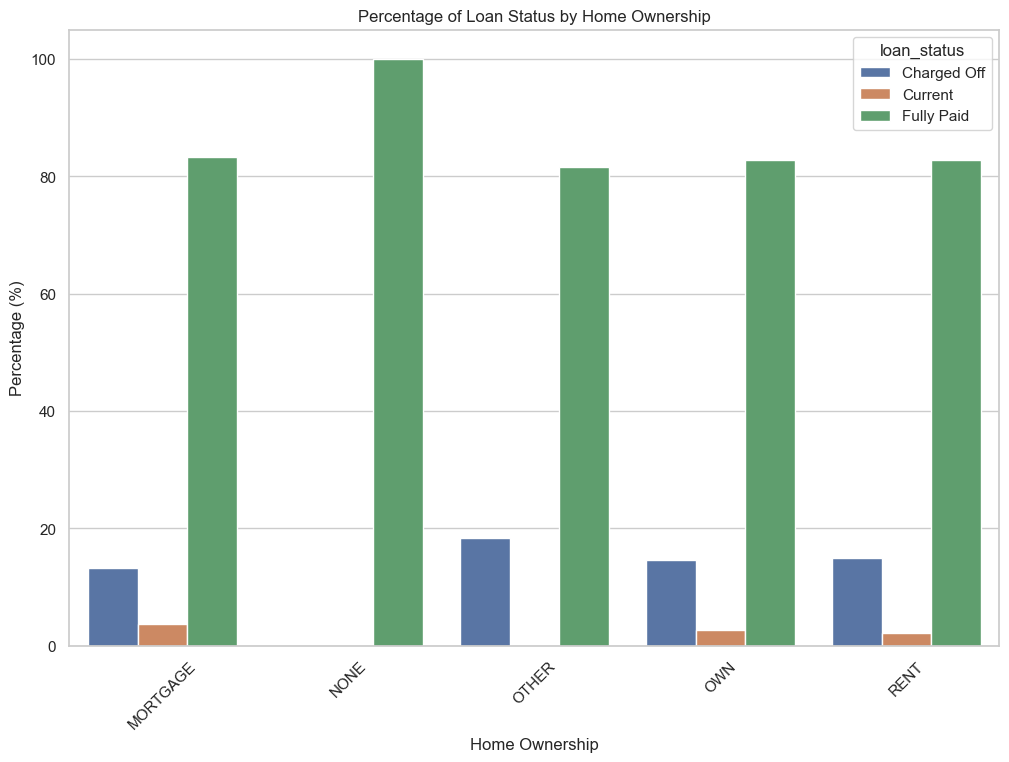

In [207]:
# Group data by home_ownership and loan_status, then count occurrences
count_data = New_df.groupby(['home_ownership', 'loan_status']).size().reset_index(name='count')

# Calculate total counts for each home_ownership category
total_counts = count_data.groupby('home_ownership')['count'].transform('sum')

# Calculate percentages
count_data['percentage'] = (count_data['count'] / total_counts) * 100

# Create the bar plot with percentages
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=count_data)

# Add labels and title
plt.title('Percentage of Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Show the plot
plt.show()



#### We have not observe any relation betn the dti and charged off

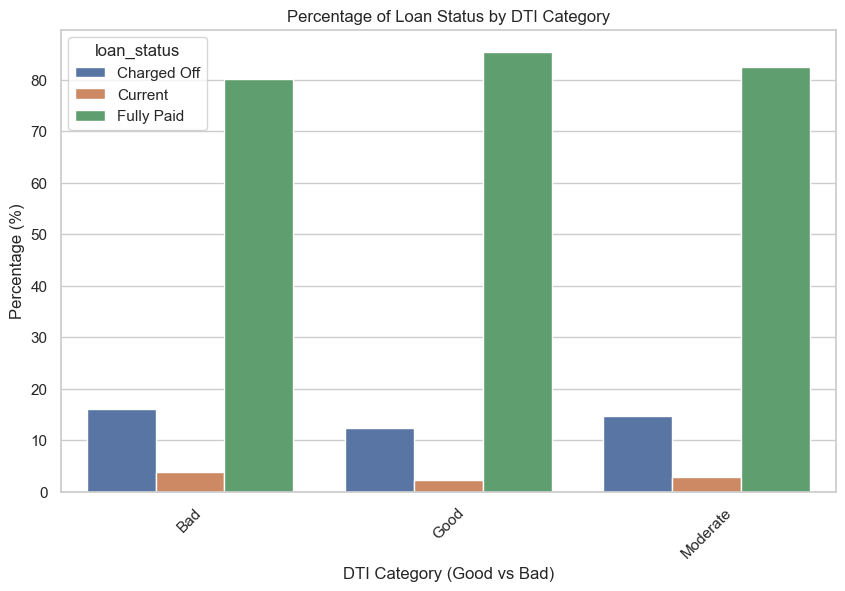

In [208]:
import pandas as pd

# Define a function to categorize dti
def categorize_dti(dti):
    if dti <= 10:
        return 'Good'
    elif dti <= 20:
        return 'Moderate'
    elif dti > 10 :
        return 'Bad'
    else :
        return 'NA'

New_df['dti_category'] = New_df['dti'].apply(categorize_dti)

count_data = New_df.groupby(['dti_category', 'loan_status']).size().reset_index(name='count')

total_counts = count_data.groupby('dti_category')['count'].transform('sum')

count_data['percentage'] = (count_data['count'] / total_counts) * 100


# Create the bar plot with percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='dti_category', y='percentage', hue='loan_status', data=count_data)

# Add labels and title
plt.title('Percentage of Loan Status by DTI Category')
plt.xlabel('DTI Category (Good vs Bad)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Show the plot
plt.show()



#### In the category of small buisness the employee having experience 0 and greater than 10 are applying for loan as compared to the other

<Axes: xlabel='emp_length'>

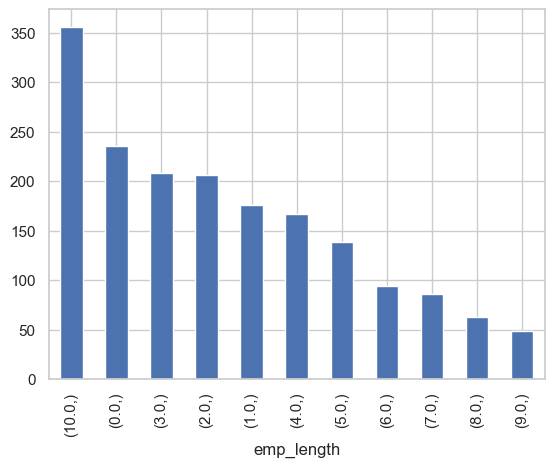

In [209]:
New_df[New_df['purpose']=='small_business'][['emp_length']].value_counts().plot.bar()

### **Bivarient**:

#### The Month From January to April are the safest month to give the Loan

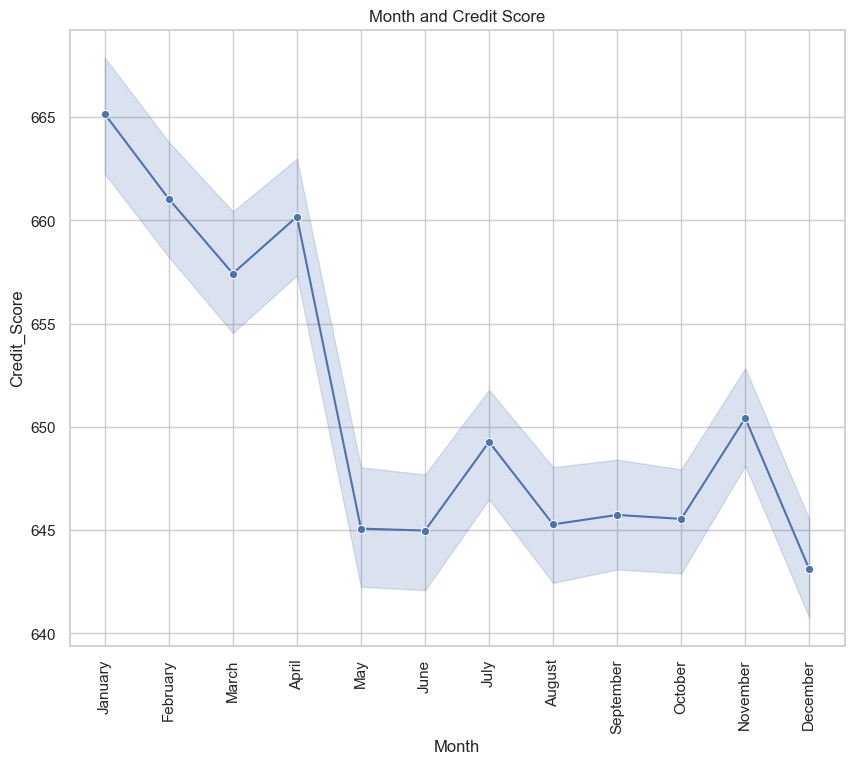

In [210]:
Month_Credit = New_df[['issue_d','Credit_Score']]
Month_Credit['issue_month'] = Month_Credit['issue_d'].dt.month_name()
month = Month_Credit[['issue_month','Credit_Score']]
month['issue_month'] = pd.Categorical(month['issue_month'], 
                                      categories=["January", "February", "March", "April", "May", "June", 
                                                  "July", "August", "September", "October", "November", "December"],
                                      ordered=True)
month

plt.figure(figsize=(10,8)) # Width and Height of the chart
sns.lineplot(x='issue_month',
             y='Credit_Score',
             data=month,
             marker='o', # Style used to mark the join between 2 points
            )
plt.xlabel('Month') # x-axis name
plt.ylabel('Credit_Score') # y-axis name
plt.title('Month and Credit Score') # Add a title
plt.xticks(rotation=90)
plt.show() # Display the graph

#### Among the total customers loan is taken for the purpose debt consolidation and credit card

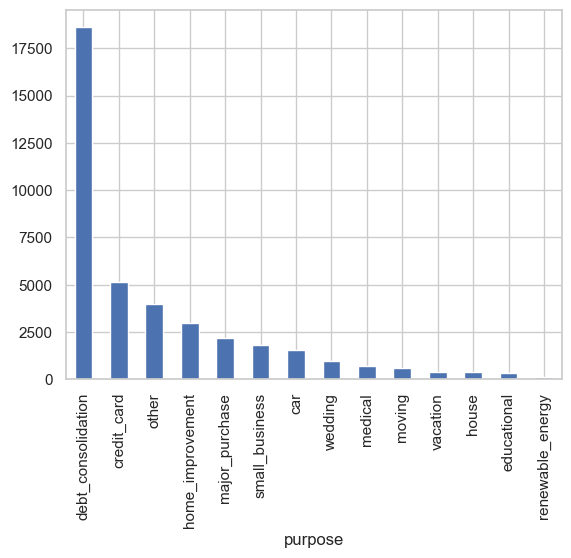

In [211]:
values = New_df['purpose'].value_counts()

# Create the plot
values.plot.bar(grid=True) # Add a grid in the background
plt.show()

### **Multi-varient**:

#### Small_business, renewabe energy and education has more chances of getting default

In [212]:
!pip install plotly

import plotly.express as px

# Group by 'purpose' and 'loan_status' and count occurrences
count_data = New_df.groupby(['purpose', 'loan_status']).size().reset_index(name='count')

# Calculate total counts for each 'purpose'
total_counts = count_data.groupby('purpose')['count'].transform('sum')

# Calculate percentages
count_data['percentage'] = (count_data['count'] / total_counts) * 100


# Create the interactive bar plot with Plotly Express
fig = px.bar(
    count_data,
    x='purpose',
    y='percentage',
    color='loan_status',
    text='count',  # Display count on hover
    barmode='group',  # Ensure bars are grouped, not stacked
    title='Interactive Grouped Bar Chart: Loan Status by Purpose',
    labels={'percentage': 'Percentage (%)', 'purpose': 'Loan Purpose', 'loan_status': 'Loan Status'},
    height=600
)

# Adjust hover data to show both percentage and count
fig.update_traces(
    hovertemplate="<br>".join([
        "Purpose: %{x}",
        "Loan Status: %{marker.color}",
        "Percentage: %{y:.2f}%",
        "Count: %{text}"
    ])
)

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='Loan Purpose',
    yaxis_title='Percentage (%)',
    legend_title='Loan Status',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Show the plot
fig.show()

#### From the Relation plot and the bar plot we plotted previously we can say that Small buisneses, Debt_consolidation, Other are those categories which has most defaulters.

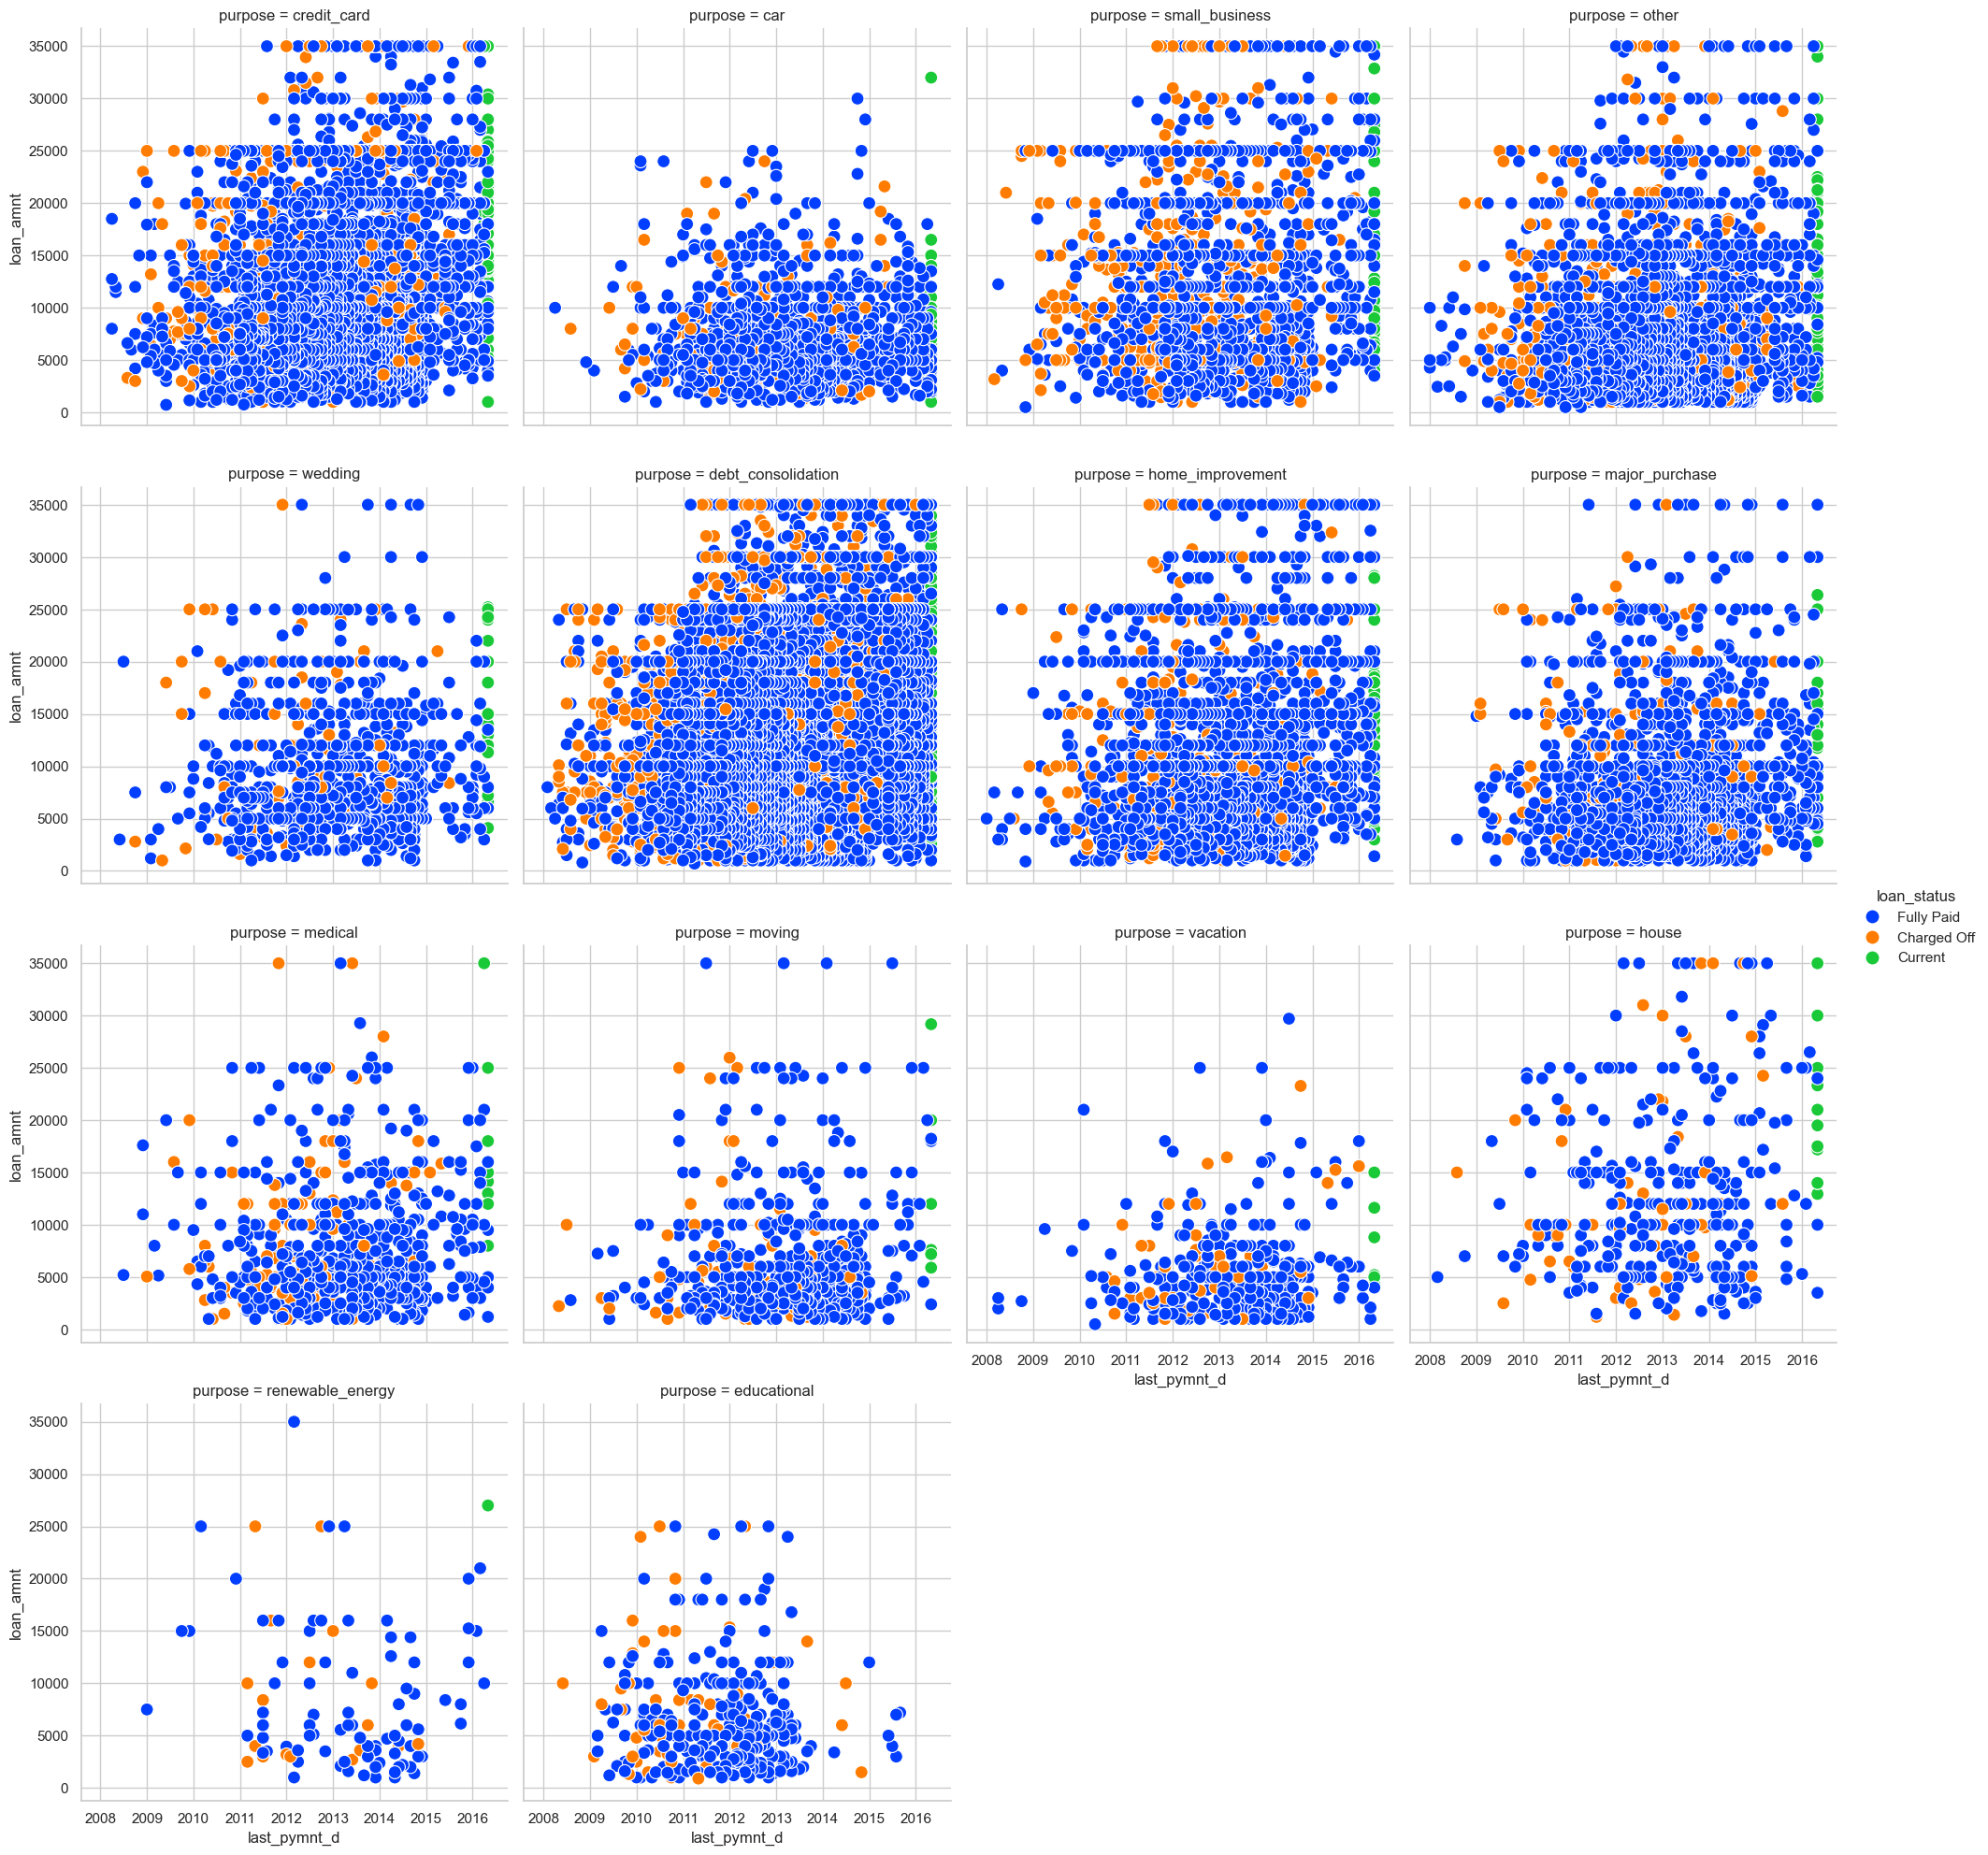

In [213]:
#plt.figure(figsize=(14, 8))
ax = sns.relplot(
    x='last_pymnt_d',
    y=New_df['loan_amnt'],  # Convert loan status to categorical codes for plotting
    hue='loan_status',
    col='purpose',
    col_wrap = 4 ,
    data=New_df,
    palette='bright',  # Choose a vibrant color palette
    s=100  # Adjust the size of the scatter points
)

plt.show()

#### Mid level employees are having very less paid customers

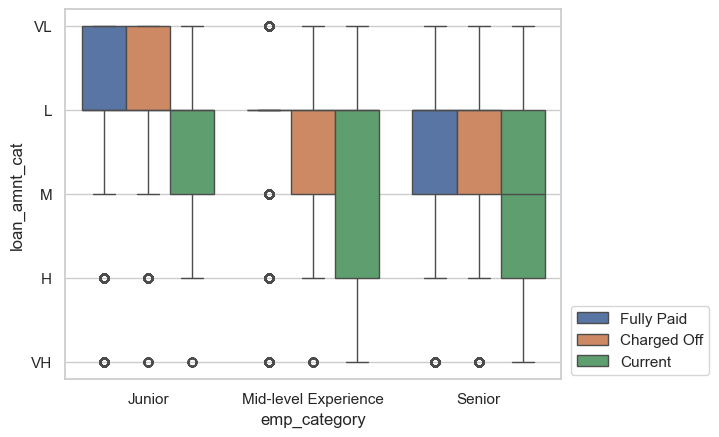

In [214]:

ax = sns.boxplot(y=New_df['loan_amnt_cat'], x=New_df['emp_category'], hue=New_df['loan_status'])

plt.legend(loc=(1.02, 0.01))

#### High interest rate has most of the defaulted cusomers

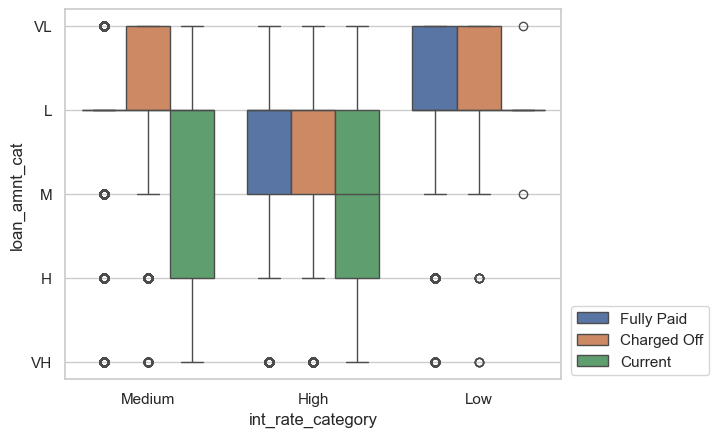

In [215]:
ax = sns.boxplot(y=New_df['loan_amnt_cat'], x=New_df['int_rate_category'], hue=New_df['loan_status'])

plt.legend(loc=(1.02, 0.01))
plt.show()

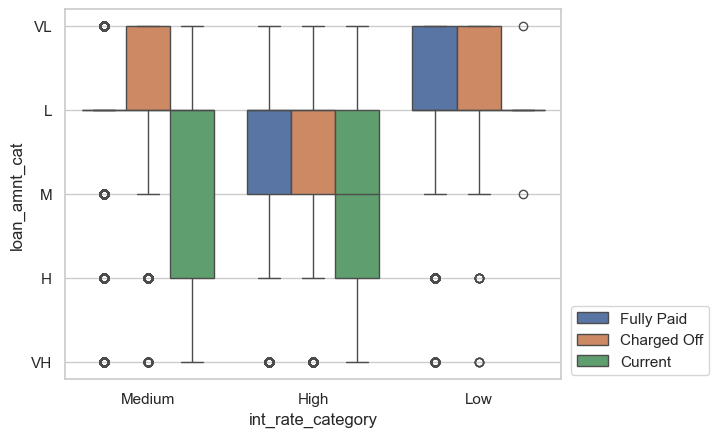

In [216]:
ax = sns.boxplot(y=New_df['loan_amnt_cat'], x=New_df['int_rate_category'], hue=New_df['loan_status'])

plt.legend(loc=(1.02, 0.01))
plt.show()

#### For low Revol credit utilization lot of customers are defaulted.

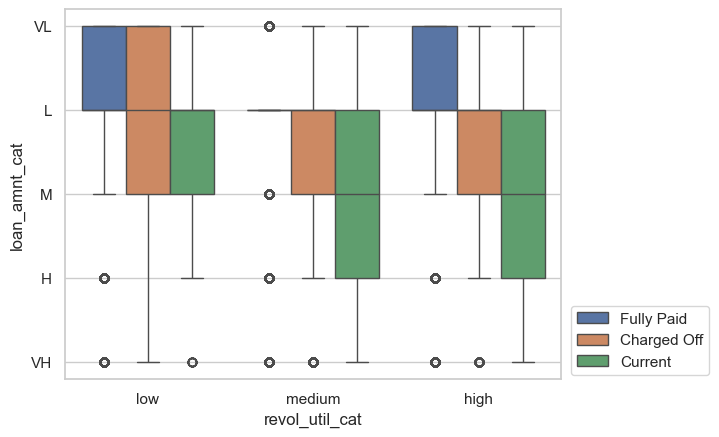

In [217]:
ax = sns.boxplot(y=New_df['loan_amnt_cat'], x=New_df['revol_util_cat'], hue=New_df['loan_status'])

plt.legend(loc=(1.02, 0.01))
plt.show()

#### earliest_cr_line is related to loan_status

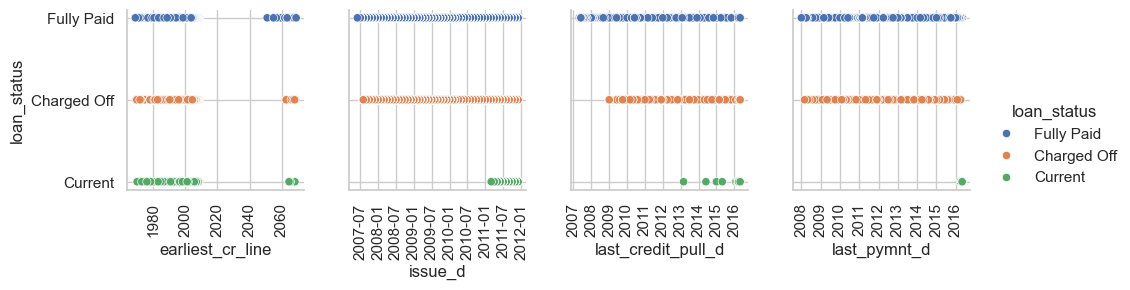

In [218]:
axs = sns.pairplot(data=New_df,              
                   x_vars=['earliest_cr_line', 'issue_d', 'last_credit_pull_d', 'last_pymnt_d'], 
                   y_vars=['loan_status'],
                   hue='loan_status'
                  )

for ax in axs.axes.flatten():
    ax.tick_params(axis='x', labelrotation=90)

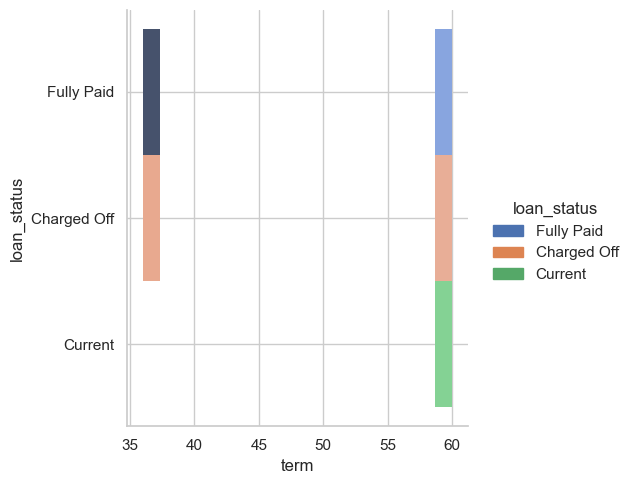

In [219]:
ax = sns.displot(y=New_df['loan_status'], 
                 x=New_df['term'], 
                 hue=New_df['loan_status'], 
                 kind='hist')

plt.show()

#### Customers default chances are high if loan amount is greater than 20000.

<Figure size 2000x1000 with 0 Axes>

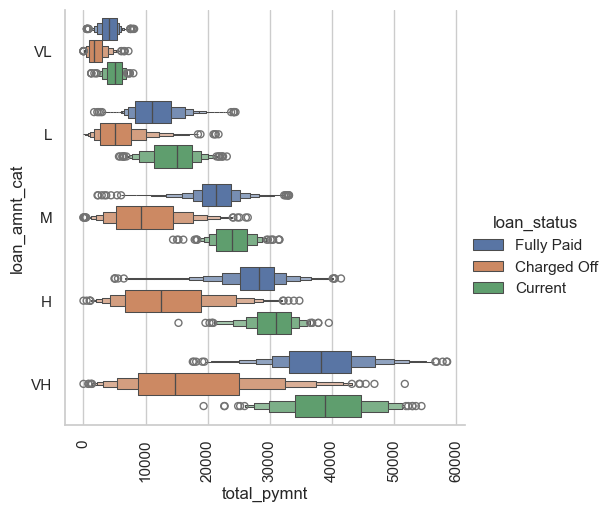

In [220]:
plt.figure(figsize=(20, 10))
fg = sns.catplot(kind='boxen',
            x=New_df['total_pymnt'],
            y=New_df['loan_amnt_cat'],
            hue=New_df['loan_status']                 
           )
plt.xticks(rotation=90)
plt.show();

<Figure size 2000x1000 with 0 Axes>

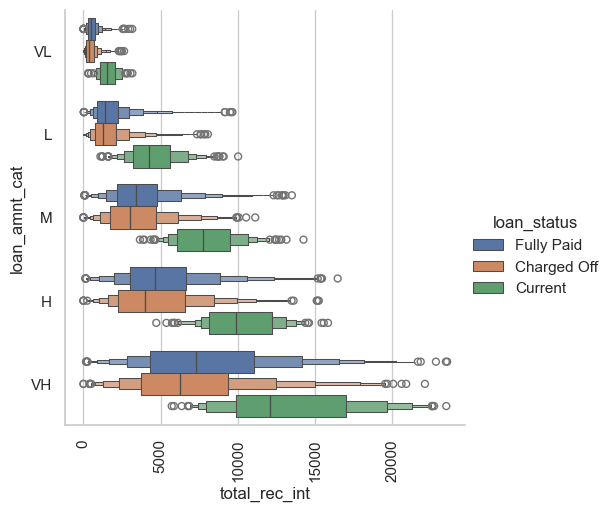

In [221]:
plt.figure(figsize=(20, 10))
fg = sns.catplot(kind='boxen',
            x=New_df['total_rec_int'],
            y=New_df['loan_amnt_cat'],
            hue=New_df['loan_status']                 
           )
plt.xticks(rotation=90)
plt.show();

#### Most of the loans are recovered from Low loan amnt category

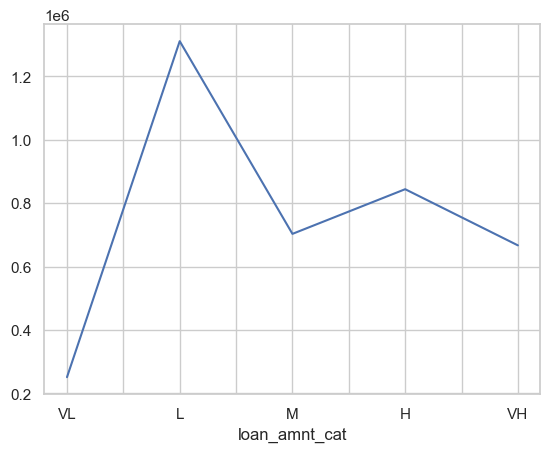

In [222]:
New_df.groupby(by='loan_amnt_cat')['recoveries'].sum().plot()
plt.show()

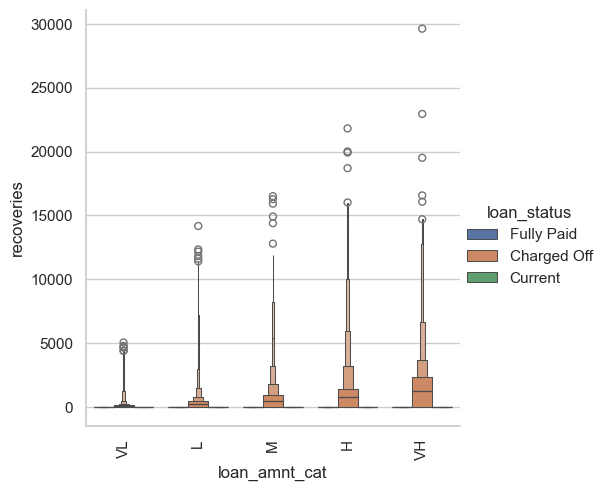

In [223]:
sns.catplot(kind='boxen', 
            x=New_df['loan_amnt_cat'], 
            y=New_df['recoveries'],
            hue=New_df['loan_status'],
           )
plt.xticks(rotation=90)
plt.show()

In [224]:
New_df[numeric_cols].nunique()

Sr.No                      39638
loan_amnt                    884
funded_amnt                 1039
funded_amnt_inv             8189
term                           2
int_rate                     371
installment                15356
emp_length                    11
annual_inc                  5310
dti                         2868
delinq_2yrs                   11
inq_last_6mths                 9
open_acc                      39
pub_rec                        2
revol_util                  1089
total_acc                     69
out_prncp                   1134
out_prncp_inv               1135
total_pymnt                37777
total_pymnt_inv            37446
total_rec_prncp             7959
total_rec_int              35082
total_rec_late_fee          1355
recoveries                  4031
collection_recovery_fee     2611
last_pymnt_amnt            34875
pub_rec_bankruptcies           2
dtype: int64

In [225]:
New_df['loan_status_cat'] = New_df['loan_status'].astype('category').cat.codes

In [226]:
New_df['loan_status_cat'].head()

0    2
1    0
2    2
3    2
4    1
Name: loan_status_cat, dtype: int8

In [227]:
New_df['loan_status'].head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
Name: loan_status, dtype: object

#### Now, we will se the correlation between **Risc_Score** and other columns like : loan_amnt, funded_amnt, term, int_rate , installment, annual_inc, dti , open_acc , pub_rec_bankruptcies , total_acc, tax_liens , Risk_Score

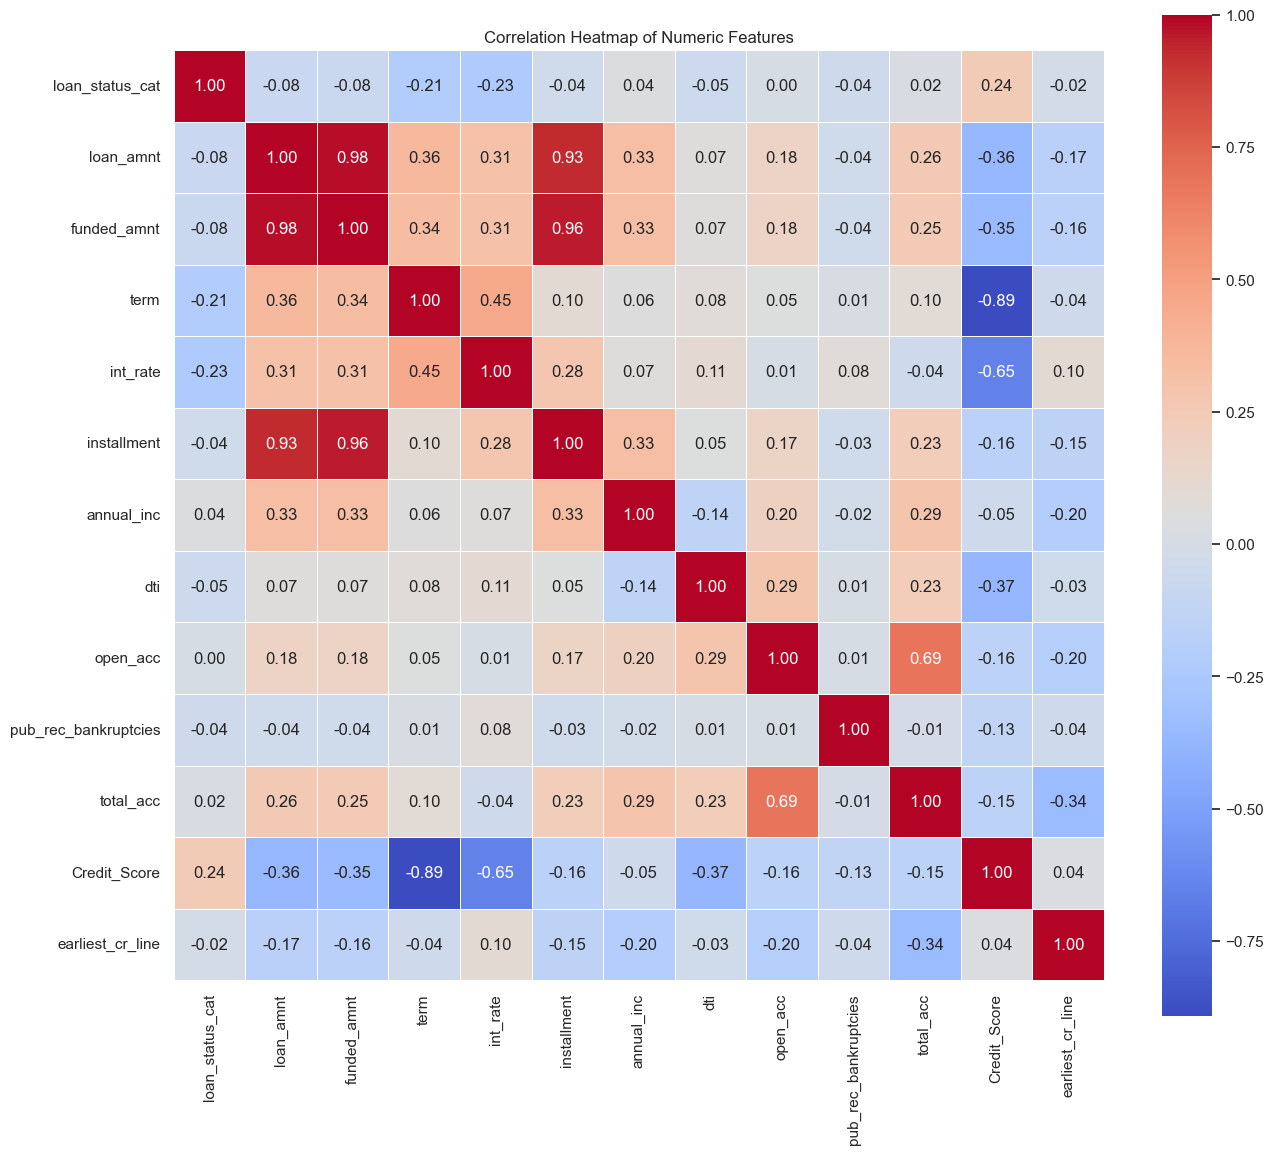

In [228]:
# Compute the correlation matrix
correlation_matrix = New_df[['loan_status_cat','loan_amnt', 'funded_amnt', 'term', 'int_rate' , 'installment', 'annual_inc', 'dti', 
                             'open_acc' , 'pub_rec_bankruptcies' , 'total_acc', 'Credit_Score', 
                             'earliest_cr_line']].corr()


plt.figure(figsize=(15, 13))  # Increase the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## <font color = DarkKhaki >**5. Insight Observation :**

### Observations from the Case Study

1. **More than 80% of customers had paid their loans in full**, while approximately 15% resulted in charge-offs.
2. A significant portion of loans was taken out by individuals with either **rent or mortgage** living situations.
3. The majority of customers fall under the **'Not Verified'** category for loan verification status.
4. **Employees with 10 years of experience** were the most frequent loan applicants, followed by new hires and those with 2 years of experience.
5. The most common customer grade was **B**, followed by grades A, C, and D.
6. There is no strong positive correlation between the **charge-off rate and the verification status** of loans.
7. The percentage of **defaults remains consistent** regardless of the borrower's experience level.
8. **High interest rates**, specifically those greater than 20%, are associated with higher default rates.
9. No strong relationship was observed between **ownership status and loan default**.
10. There is no observed correlation between the **debt-to-income ratio and charge-off rates**.
11. In the small business category, employees with either no experience or more than 10 years of experience are more likely to apply for loans compared to others.
12. The months from **January to April** are considered the safest for issuing loans.
13. A significant number of total loans were taken out for **debt consolidation and credit card** purposes.
14. Loan categories such as **small business, renewable energy, and education** are more prone to defaults.
15. From previously plotted relation and bar plots, it is evident that **small businesses, debt consolidation, and other such categories** have the highest number of defaulters.
16. **Mid-level employees** have a lower percentage of fully paid customers.
17. Loans with **high interest rates** have a higher incidence of defaults.
18. A high number of defaults are associated with **low revolving credit utilization**.
19. There is a relationship between the **earliest credit line and loan status**.
20. Customers are more likely to default on loans **greater than $20,000**.
21. Loans of lower amounts are **more frequently recovered**.
22. A strong negative correlation exists between **credit score and total accounts**; as the number of credit lines increases, the risk score decreases, raising the likelihood of default.
23. A similar negative correlation is noted between **credit score and open accounts**; more open credit lines increase the likelihood of default.
24. A higher number of **public record bankruptcies** correlates with lower credit scores and higher default risk.
25. **Higher debt-to-income ratios** are associated with increased default risks.
26. **Interest rate, loan term, installment, annual income, and loan amount** have negligible impacts on default likelihood.


## <font color = Peru >**6. Summary and Recommendations :**

### Recommendations

- **Adjust Interest Rates**: <span style="color:blue;">Reassess and potentially lower interest rates</span> for loans over 20% to reduce default risks.

- **Sector-Specific Strategies**: Develop <span style="color:green;">tailored risk mitigation strategies</span> for sectors like small businesses, renewable energy, and education that are more prone to defaults.

- **Refine Credit Scoring**: <span style="color:red;">Enhance credit scoring models</span> to better factor in the number of open and total credit accounts.

- **Manage Loan Sizes**: Implement <span style="color:purple;">stricter underwriting criteria</span> for loans above $20,000 and encourage smaller loan amounts to decrease default likelihood.

- **Proactive Monitoring**: <span style="color:orange;">Continuously monitor</span> borrower's financial health and implement early intervention for loans at risk of defaulting.

